# Insights

## precipitation

In [1]:
import pandas as pd
import numpy as np
#==================================

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


import warnings

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [2]:
info_prec = pd.read_parquet('data/fedearroz_prec_diaria_2024.parquet')


# summary

In [3]:
info_prec['date'] = pd.to_datetime(info_prec['date'])
grouped = info_prec.groupby(['lat', 'lon', 'dpto', 'mun', 'station']).agg(
    fecha_max=('date', 'max'),
    fecha_min=('date', 'min'),
    total_dias=('precipitation', 'size'),  # Total de registros por grupo
    eventos=('evento_lluvia', lambda x: (x == 1).sum()),
    noeventos=('evento_lluvia', lambda x: (x ==0).sum()),
    vacios=('precipitation', lambda x: x.isna().sum())  # Total de vacíos
)



def diferencia_meses(fecha_max, fecha_min):
    return (fecha_max.year - fecha_min.year) * 12 + fecha_max.month - fecha_min.month

# Aplicar la función para calcular los meses de historia
grouped['historia_meses'] = grouped.apply(lambda row: diferencia_meses(row['fecha_max'], row['fecha_min']), axis=1)

# Calcular porcentaje de vacíos
grouped['porcentaje_vacios'] = np.round((grouped['vacios'] / grouped['total_dias']) * 100,1)
grouped['porcentaje_eventos'] = np.round((grouped['eventos'] / grouped['total_dias']) * 100,1)

grouped.head()

fecha_max  \
lat     lon       dpto  mun         station                                       
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA 2024-08-15   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL      2022-10-15   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO        2024-05-06   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA     2024-08-15   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS   2024-05-06   

                                                                      fecha_min  \
lat     lon       dpto  mun         station                                       
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA 2011-10-11   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL      2011-08-24   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO        2017-01-10   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA     2011-10-11   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS   2011-09-15   

                                                                      total_dias  \
lat     lon       dpto  mun         station                                        
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA        4693   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL             4071   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO               2674   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA            4693   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS          4618   

                                                                      eventos  \
lat     lon       dpto  mun         station                                     
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA     1645   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL          1287   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO             707   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA         1306   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS       1980   

                                                                      noeventos  \
lat     lon       dpto  mun         station                                       
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA       2880   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL            2330   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO              1665   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA           2788   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS         2227   

                                                                      vacios  \
lat     lon       dpto  mun         station                                    
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA     168   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL          454   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO            302   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA         599   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS       411   

                                                                      historia_meses  \
lat     lon       dpto  mun         station                                            
2.69814 -75.29815 HUILA CAMPOALEGRE FEDEARROZ_CAMPOALEGRE_ALTAGRACIA             154   
2.88457 -75.44166 HUILA PALERMO     FEDEARROZ_PALERMO_ASOJUNCAL                  134   
3.08083 -75.19083 HUILA TELLO       FEDEARROZ_TELLO_SAN_DIEGO                     88   
3.24609 -75.23978 HUILA AIPE        FEDEARROZ_AIPE_PIEDRAPINTADA                 154   
3.30278 -73.56722 META  GRANADA     FEDEARROZ_GRANADA_LOS_NARANJOS            

# Gráficas

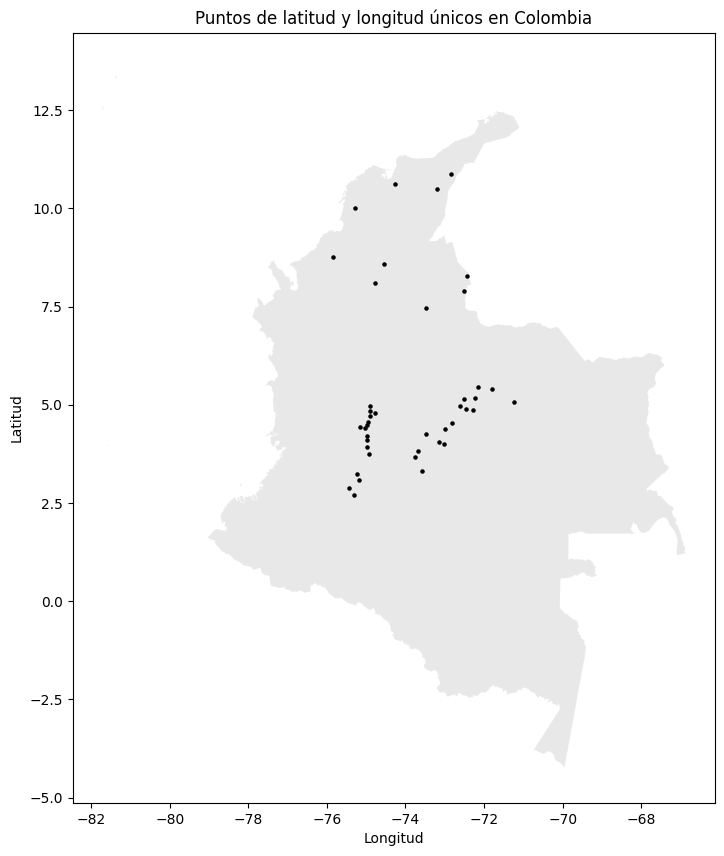

In [5]:

info_prec_unique = info_prec.drop_duplicates(subset=['lat', 'lon'])

# Cargar el shapefile descargado manualmente de Natural Earth
shapefile_path = 'maps/ne_10m_admin_0_countries.shp'  
world = gpd.read_file(shapefile_path)

colombia = world[world['ADMIN'] == 'Colombia']

gdf = gpd.GeoDataFrame(info_prec_unique, geometry=gpd.points_from_xy(info_prec_unique.lon, info_prec_unique.lat))

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='lightgray', alpha=0.5) 
gdf.plot(ax=ax, color='black', markersize=5)  

plt.title('Puntos de latitud y longitud únicos en Colombia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


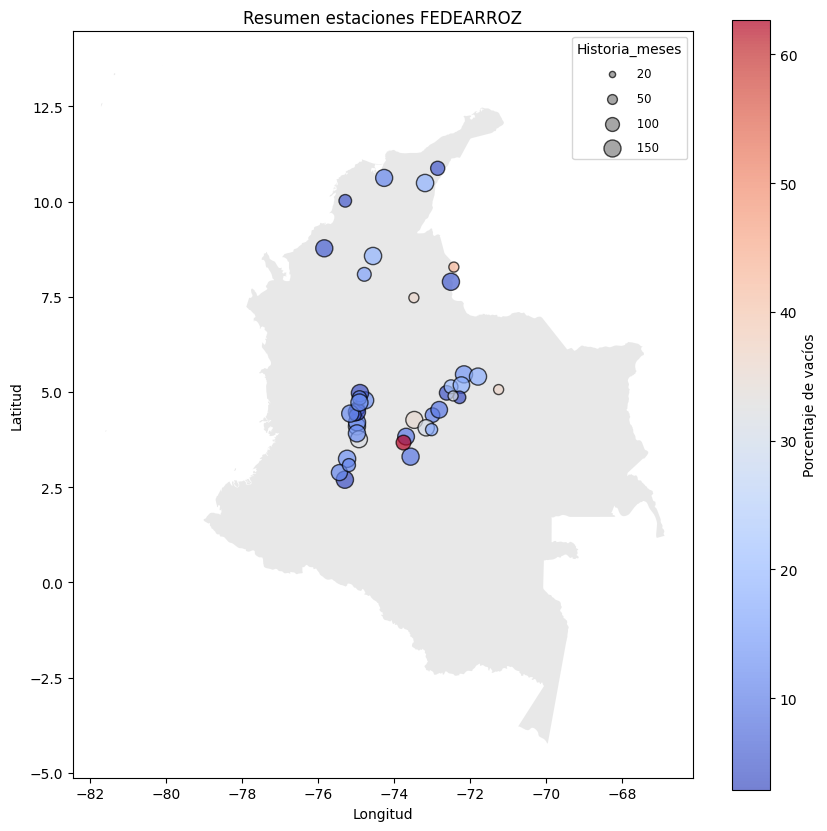

In [6]:

gdf = gpd.GeoDataFrame(info_prec_unique, geometry=gpd.points_from_xy(info_prec_unique.lon, info_prec_unique.lat))

merged = pd.merge(info_prec_unique, grouped, on=['lat', 'lon', 'dpto', 'mun', 'station'], how='left')

gdf_merged = gpd.GeoDataFrame(merged, geometry=gpd.points_from_xy(merged.lon, merged.lat))

shapefile_path = 'maps/ne_10m_admin_0_countries.shp'  
world = gpd.read_file(shapefile_path)
colombia = world[world['ADMIN'] == 'Colombia']


fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='lightgray', alpha=0.5)  


sc = ax.scatter(
    gdf_merged.geometry.x, gdf_merged.geometry.y,
    c=gdf_merged['porcentaje_vacios'],  
    s=gdf_merged['historia_meses'],  
    cmap='coolwarm', 
    alpha=0.7,
    edgecolor='k'
)


cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Porcentaje de vacíos')

for size in [20,50, 100, 150]: 
    ax.scatter([], [], s=size, color='gray', alpha=0.7, edgecolor='k', label=f' {size}')


ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Historia_meses', fontsize='small')

# Etiquetas y título
plt.title('Resumen estaciones FEDEARROZ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()


## DATA MENSUAL

In [7]:
monthly = pd.read_parquet('data/prec_monthly_obs_sat.parquet')

In [8]:
monthly.station.nunique()

42

In [9]:
clas = pd.read_excel('data/semaforo.xlsx')
monthly = monthly.merge(clas[['dpto','station', 'clasificacion']], how='left', on=['dpto','station'])

In [10]:
monthly.clasificacion.isnull().sum()

0

# Visualizaciones de las series

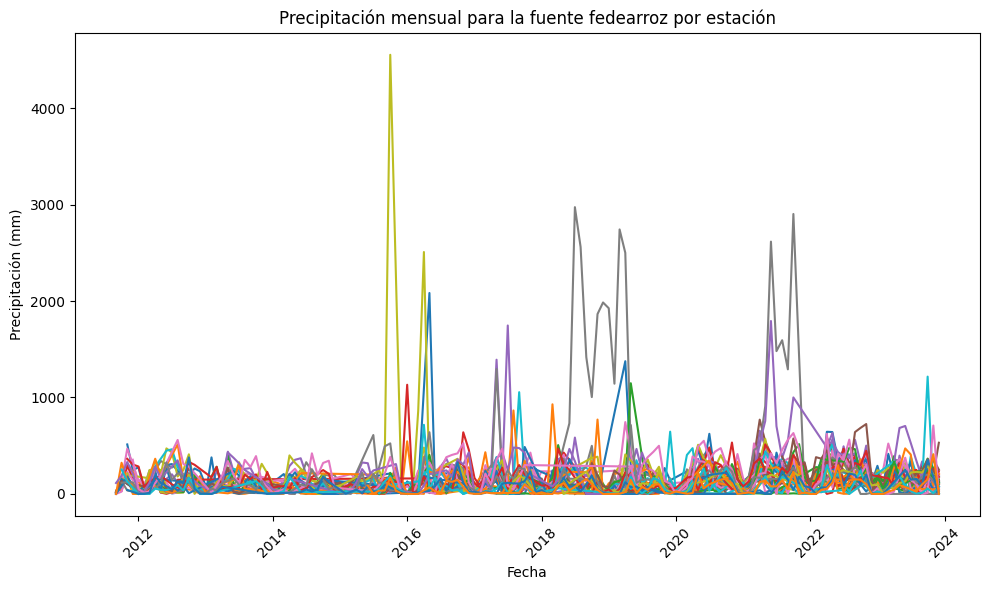

In [11]:

if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())


df_fedearroz = monthly[monthly['fuente'] == 'fedearroz']

plt.figure(figsize=(10, 6))


for station in df_fedearroz['station'].unique():
    df_station = df_fedearroz[df_fedearroz['station'] == station]
    plt.plot(df_station['month_year'], df_station['prec_month'], label=station)


plt.title('Precipitación mensual para la fuente fedearroz por estación')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Por departamento

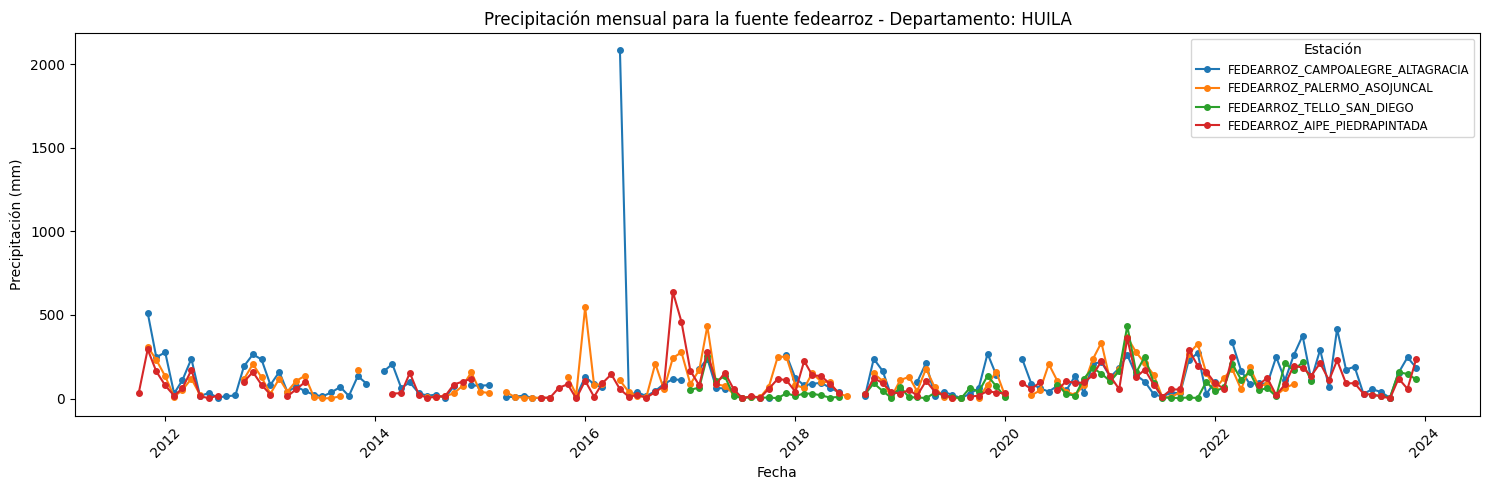

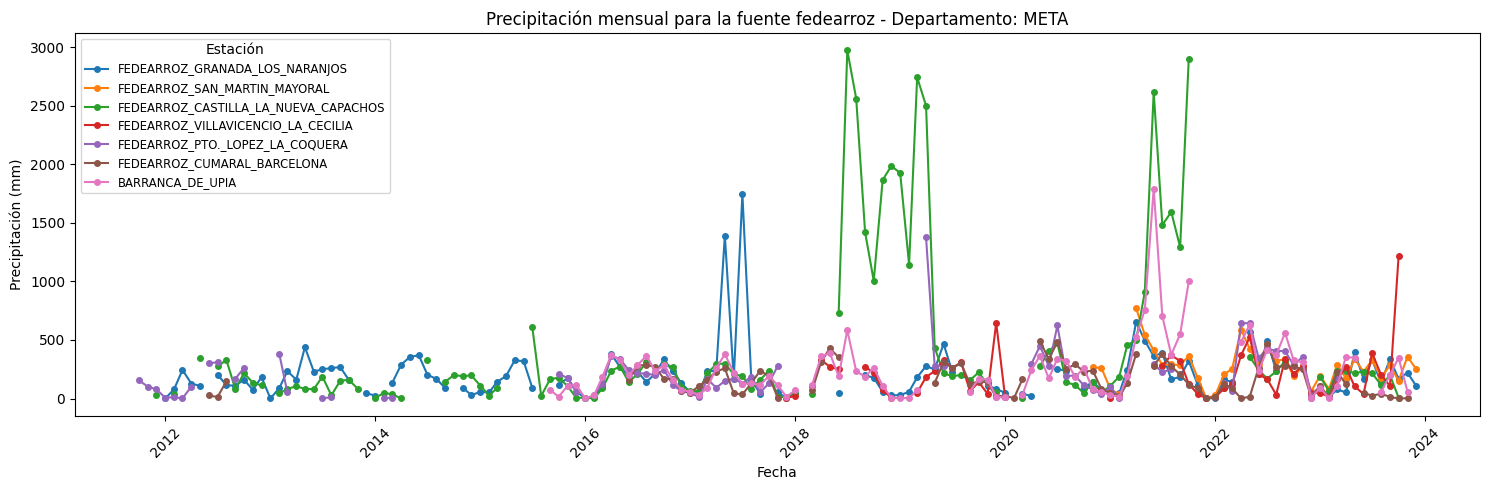

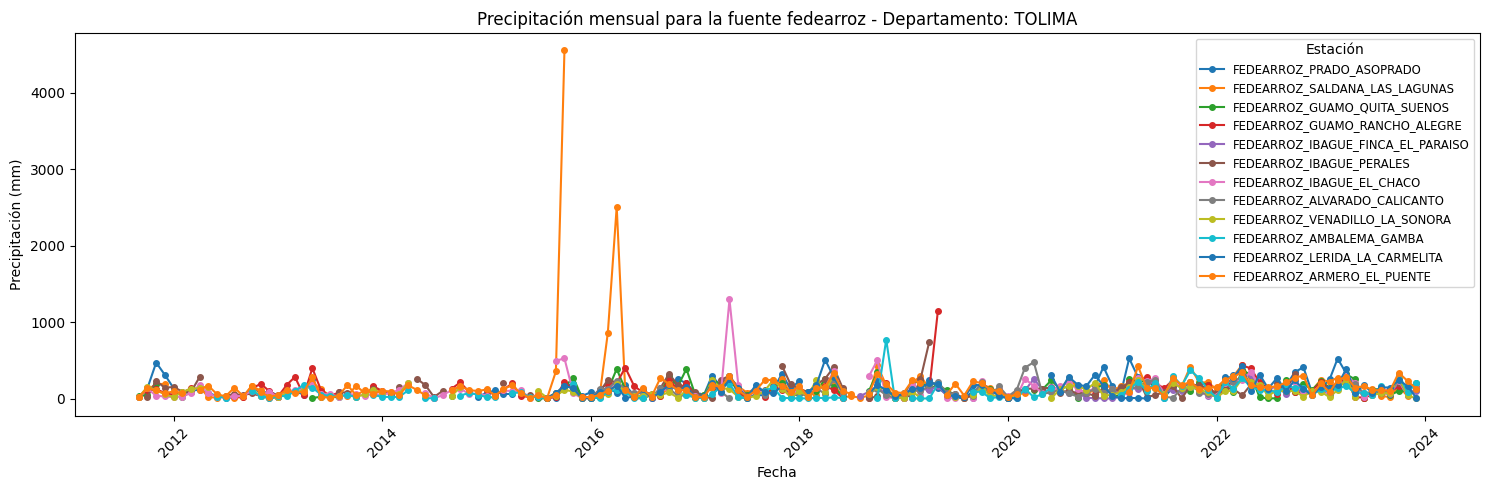

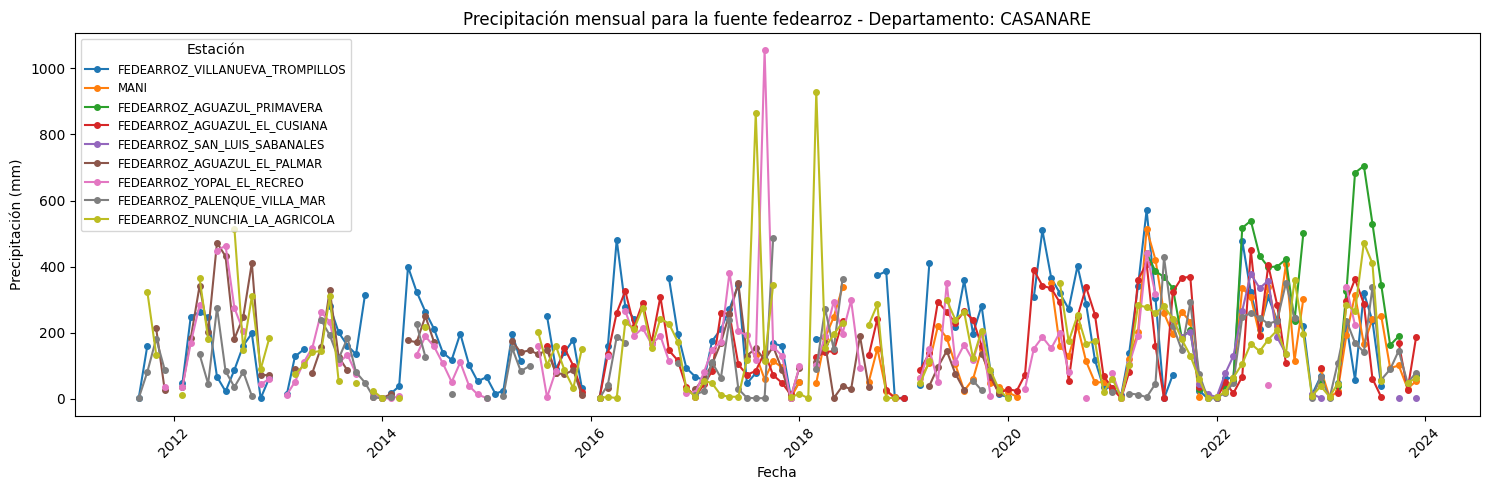

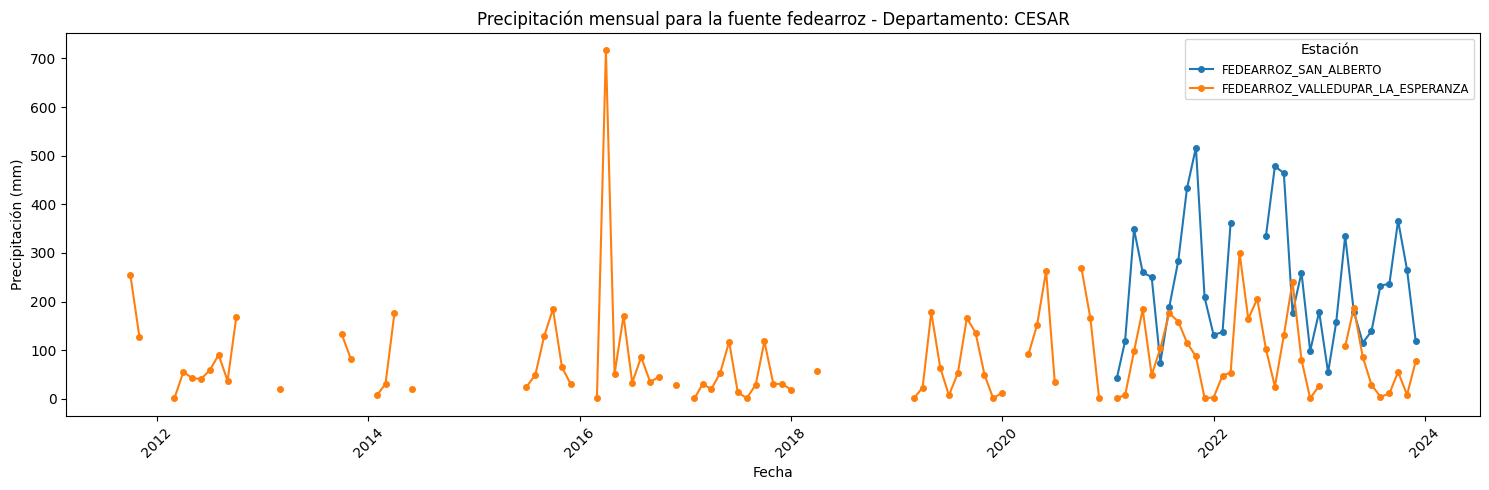

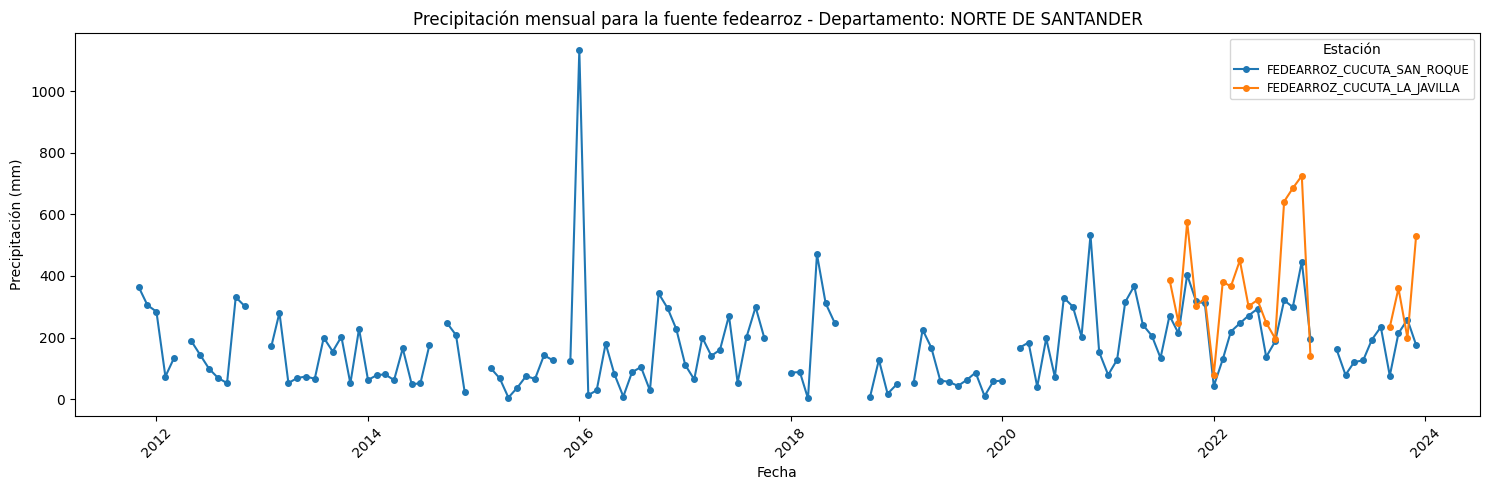

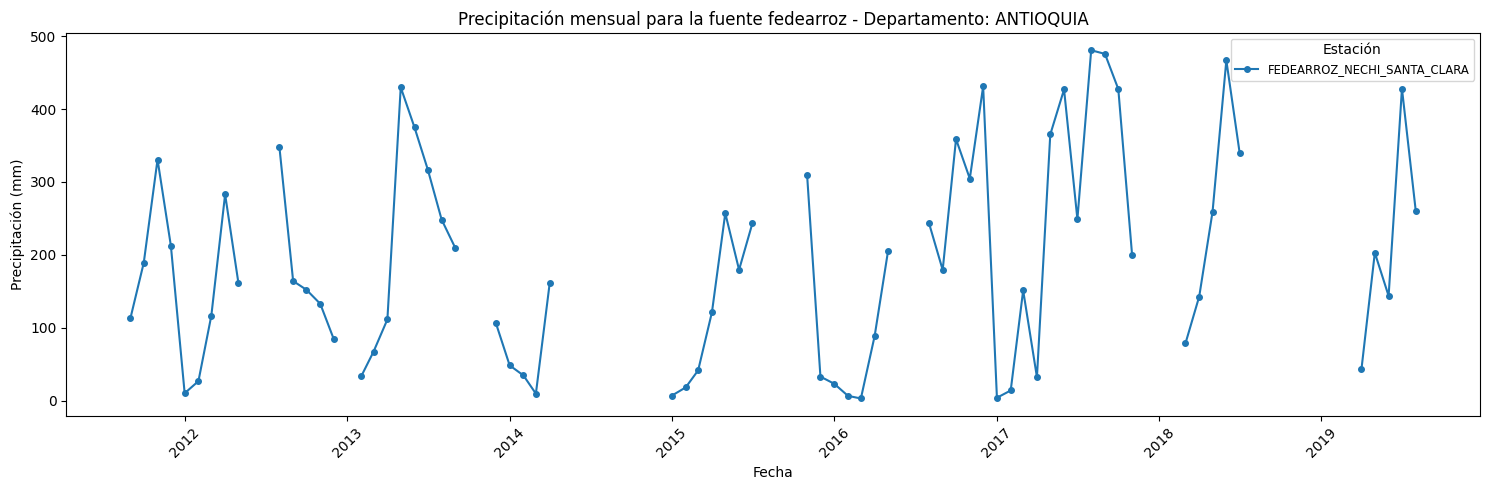

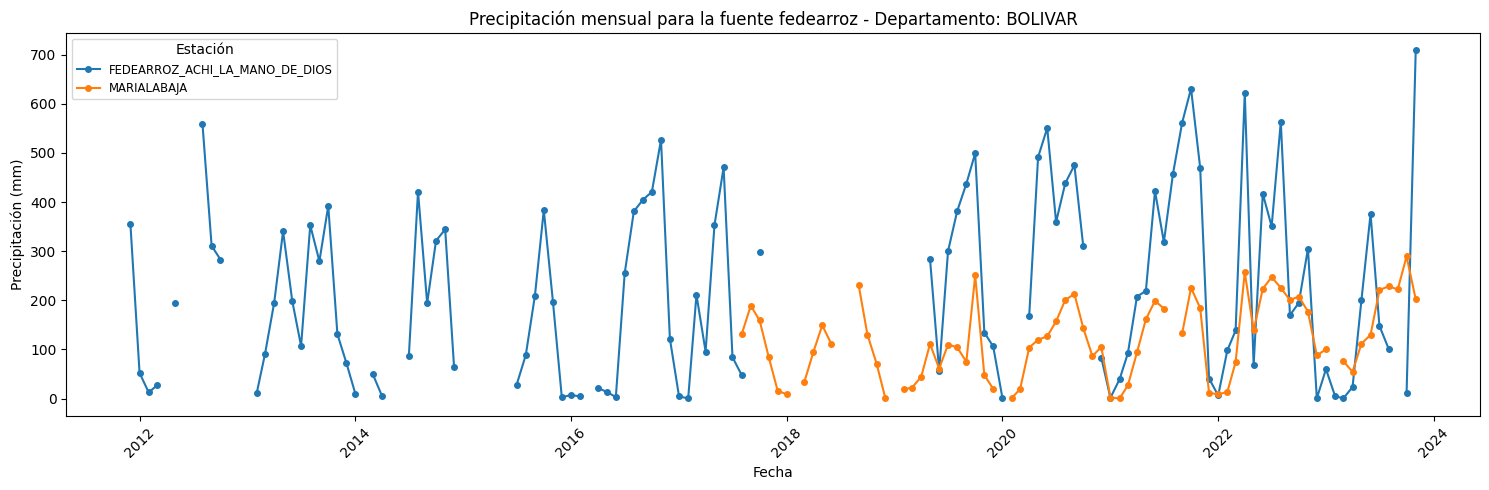

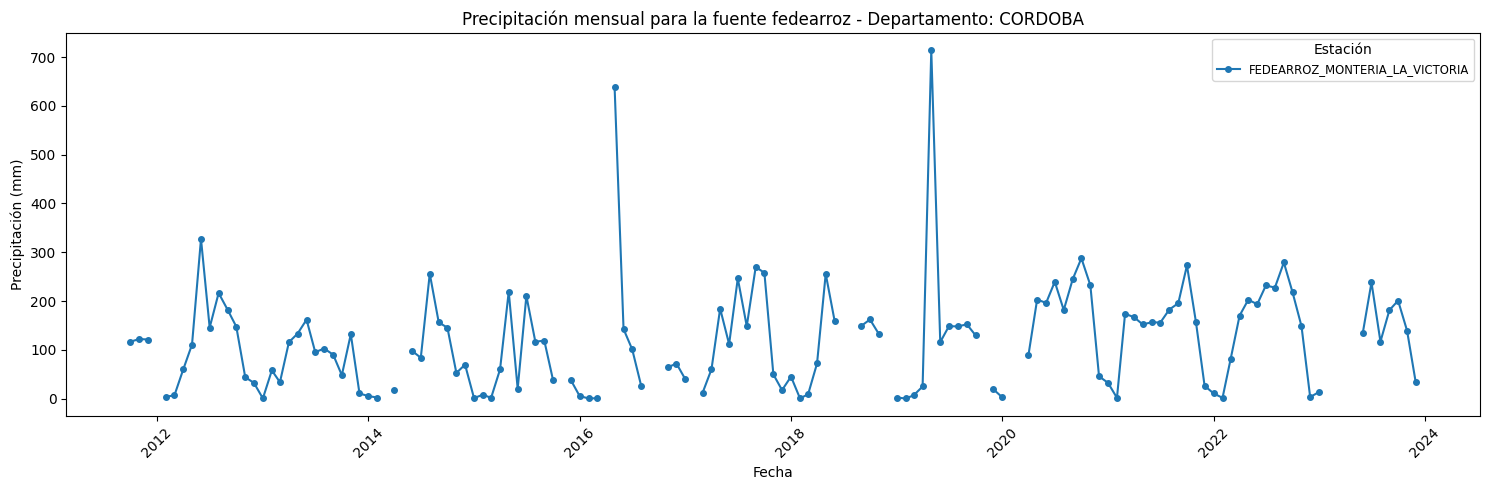

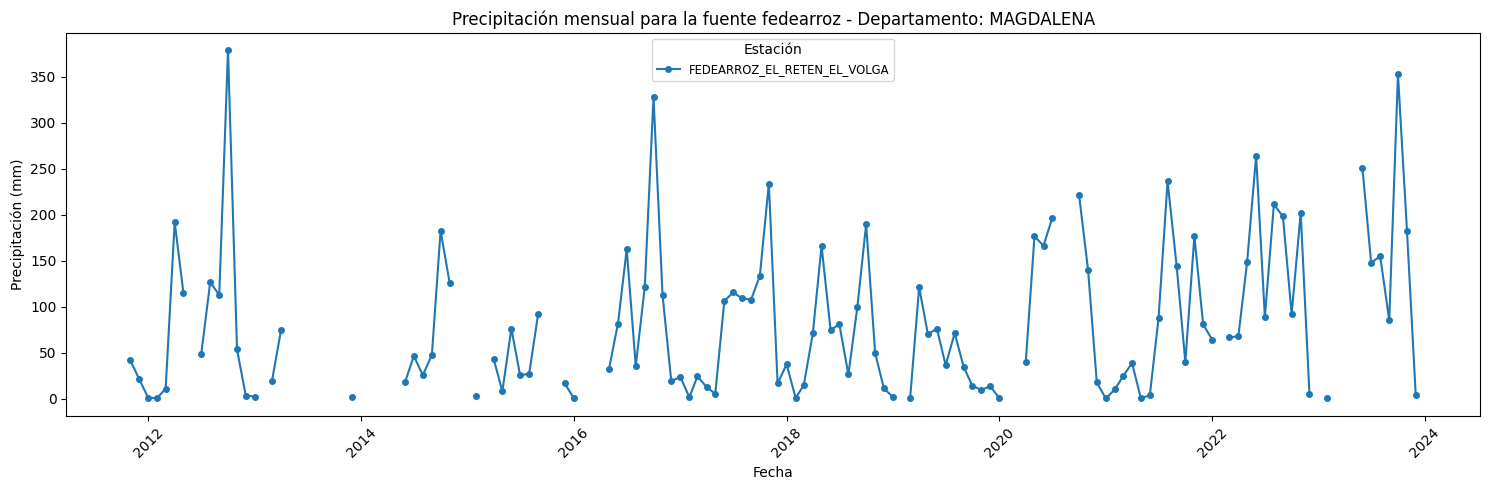

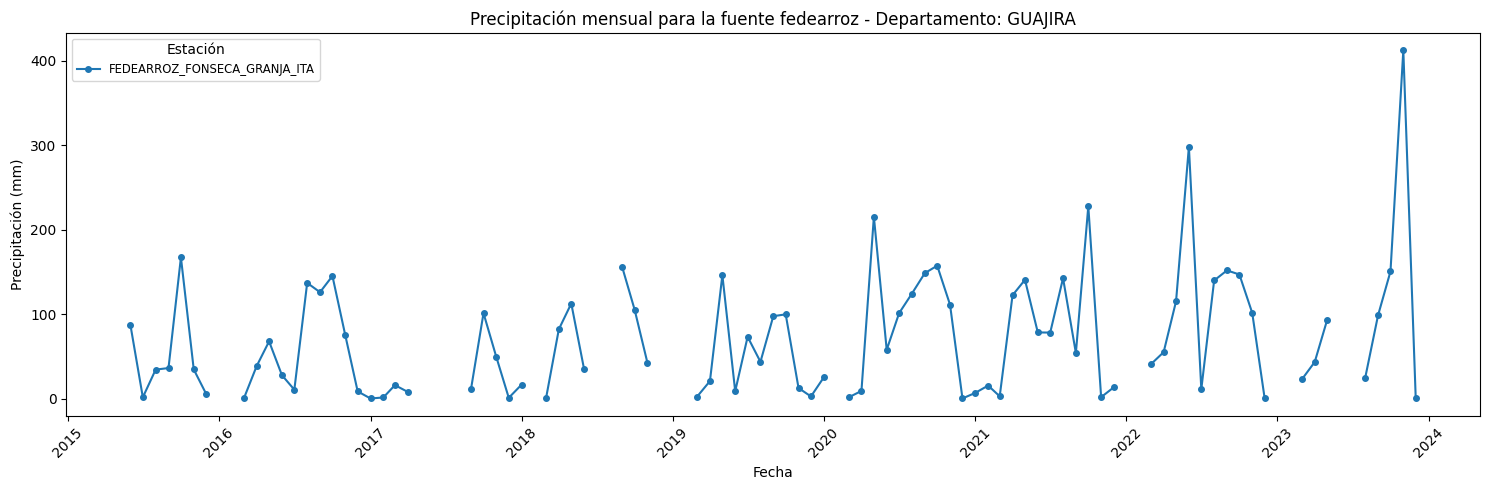

In [12]:

if isinstance(monthly['month_year'].dtype, pd.PeriodDtype):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())

monthly['prec_month'] = monthly['prec_month'].replace(0, np.nan)


df_fedearroz = monthly[monthly['fuente'] == 'fedearroz']
for dpto in df_fedearroz['dpto'].unique():
    df_dpto = df_fedearroz[df_fedearroz['dpto'] == dpto]
    
    plt.figure(figsize=(15, 5))

    for station in df_dpto['station'].unique():
        df_station = df_dpto[df_dpto['station'] == station].set_index('month_year')
        all_dates = pd.date_range(start=df_station.index.min(), end=df_station.index.max(), freq='MS')

        df_station = df_station.reindex(all_dates)
        plt.plot(df_station.index, df_station['prec_month'], label=station, marker='o', linestyle='-', markersize=4)

    
    plt.title(f'Precipitación mensual para la fuente fedearroz - Departamento: {dpto}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')

    
    plt.legend(title='Estación', fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# por clasificacion

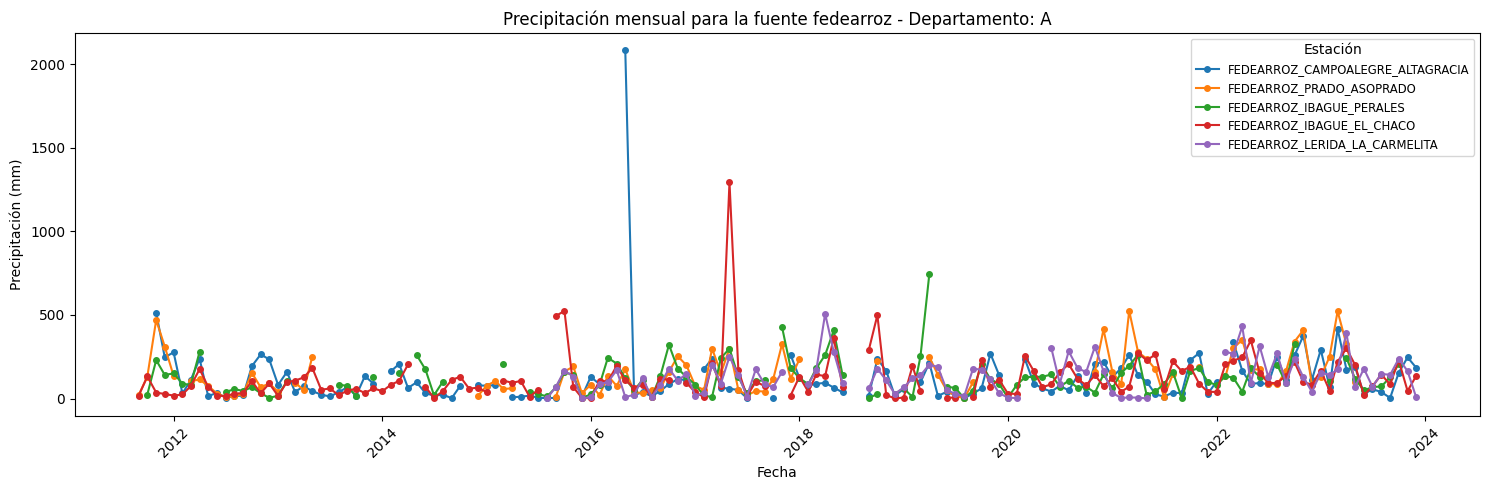

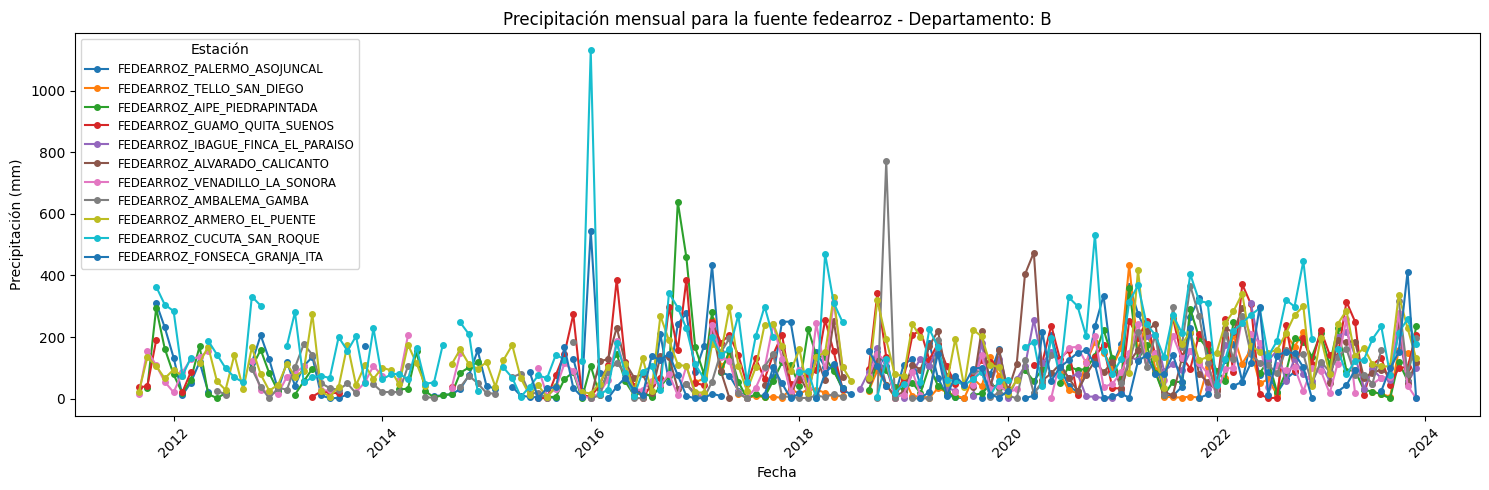

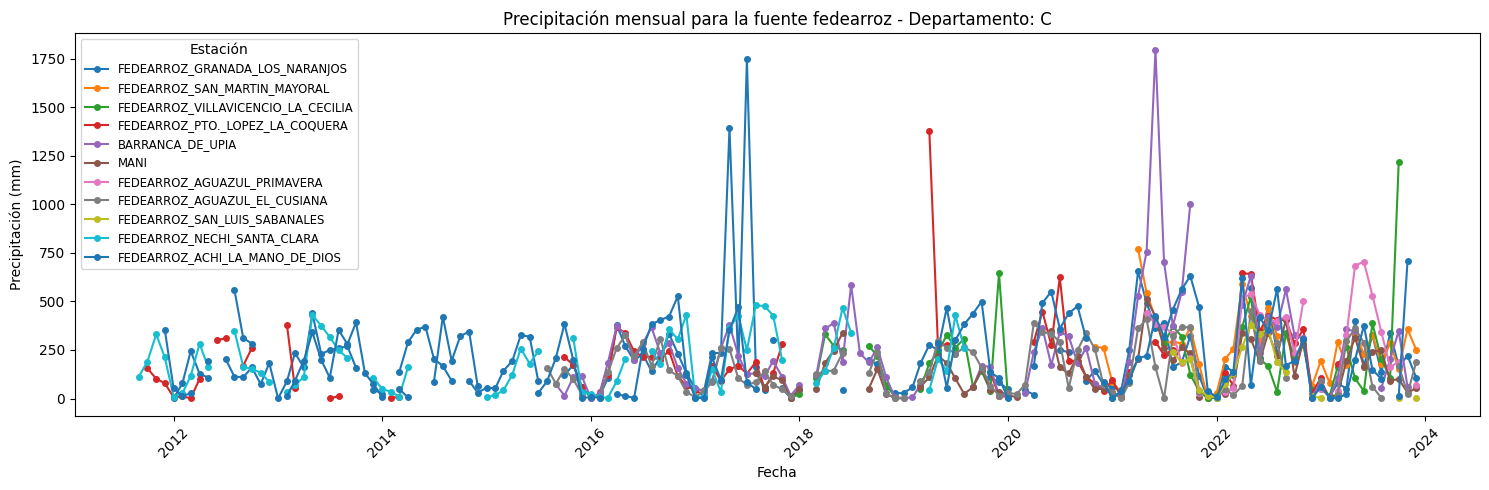

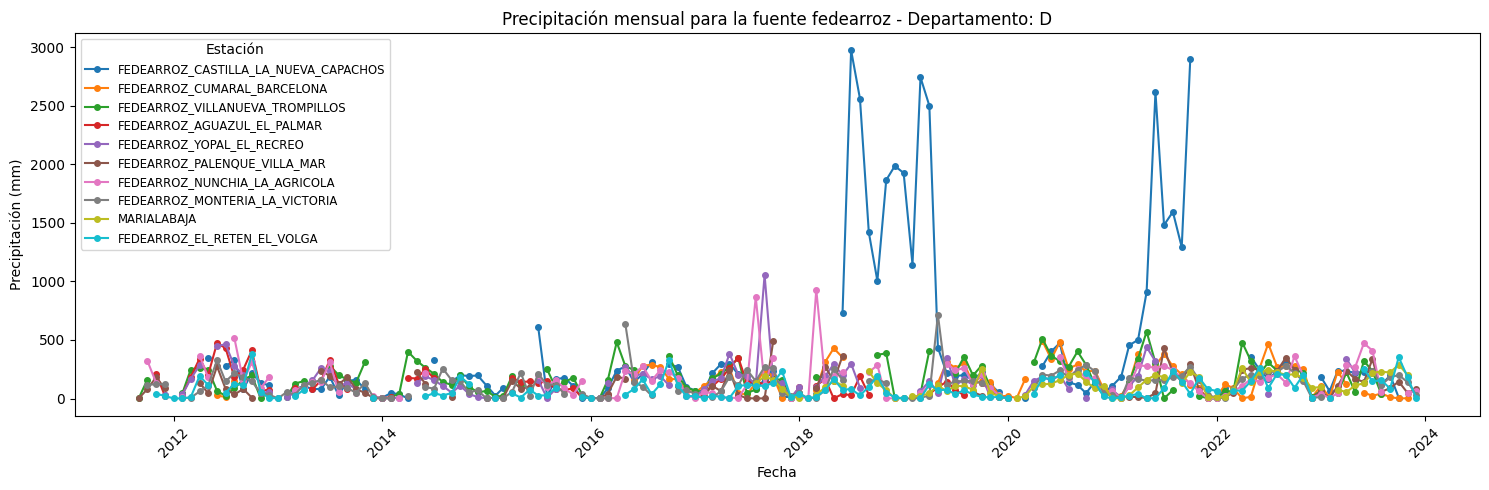

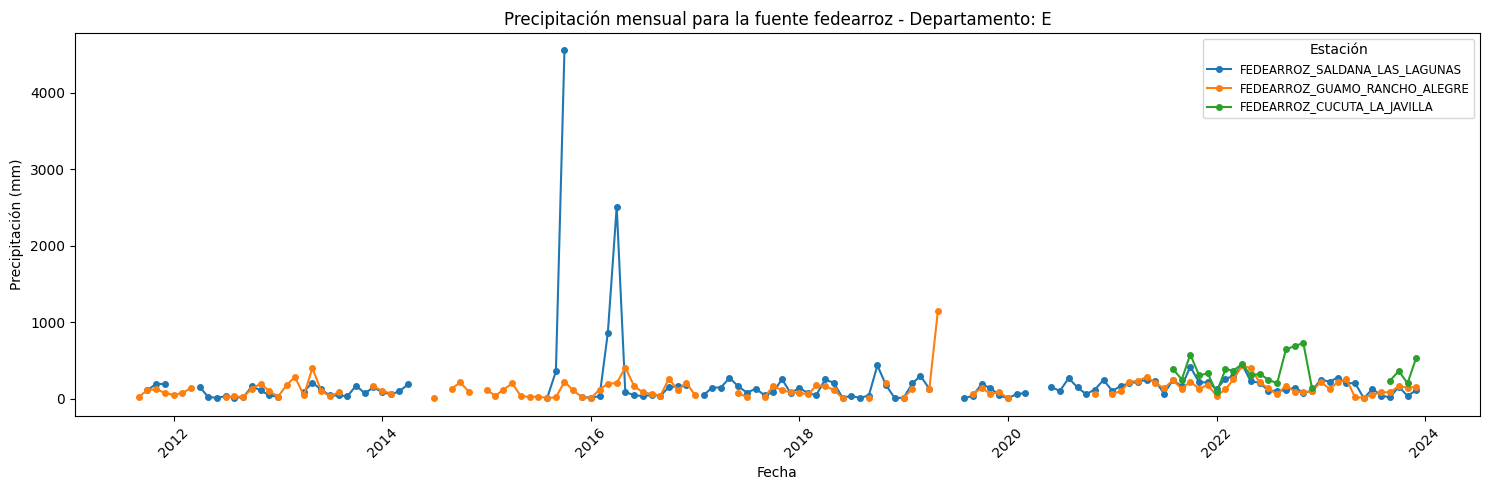

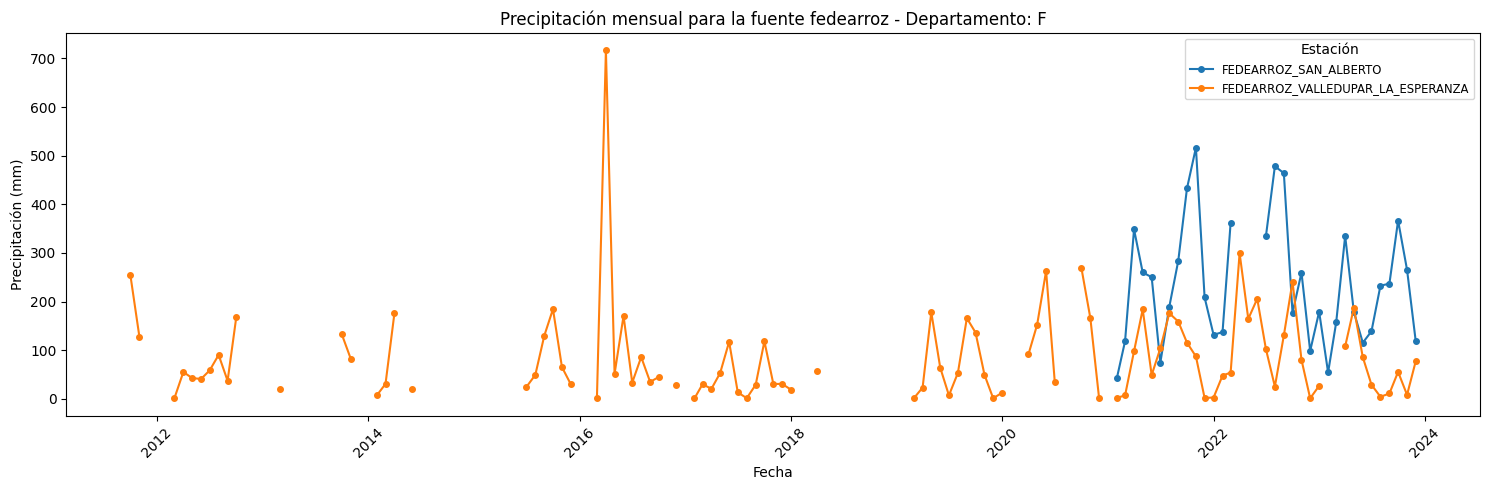

In [13]:
if isinstance(monthly['month_year'].dtype, pd.PeriodDtype):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())
    
monthly['prec_month'] = monthly['prec_month'].replace(0, np.nan)

df_fedearroz = monthly[monthly['fuente'] == 'fedearroz']

for clas in df_fedearroz['clasificacion'].unique():
    df_dpto = df_fedearroz[df_fedearroz['clasificacion'] == clas]
    
    plt.figure(figsize=(15, 5))
    
    for station in df_dpto['station'].unique():
        df_station = df_dpto[df_dpto['station'] == station].set_index('month_year')
        
        all_dates = pd.date_range(start=df_station.index.min(), end=df_station.index.max(), freq='MS')
        
        df_station = df_station.reindex(all_dates)
        
        plt.plot(df_station.index, df_station['prec_month'], label=station, marker='o', linestyle='-', markersize=4)

   

    plt.title(f'Precipitación mensual para la fuente fedearroz - Departamento: {clas}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')
    
    plt.legend(title='Estación', fontsize='small')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

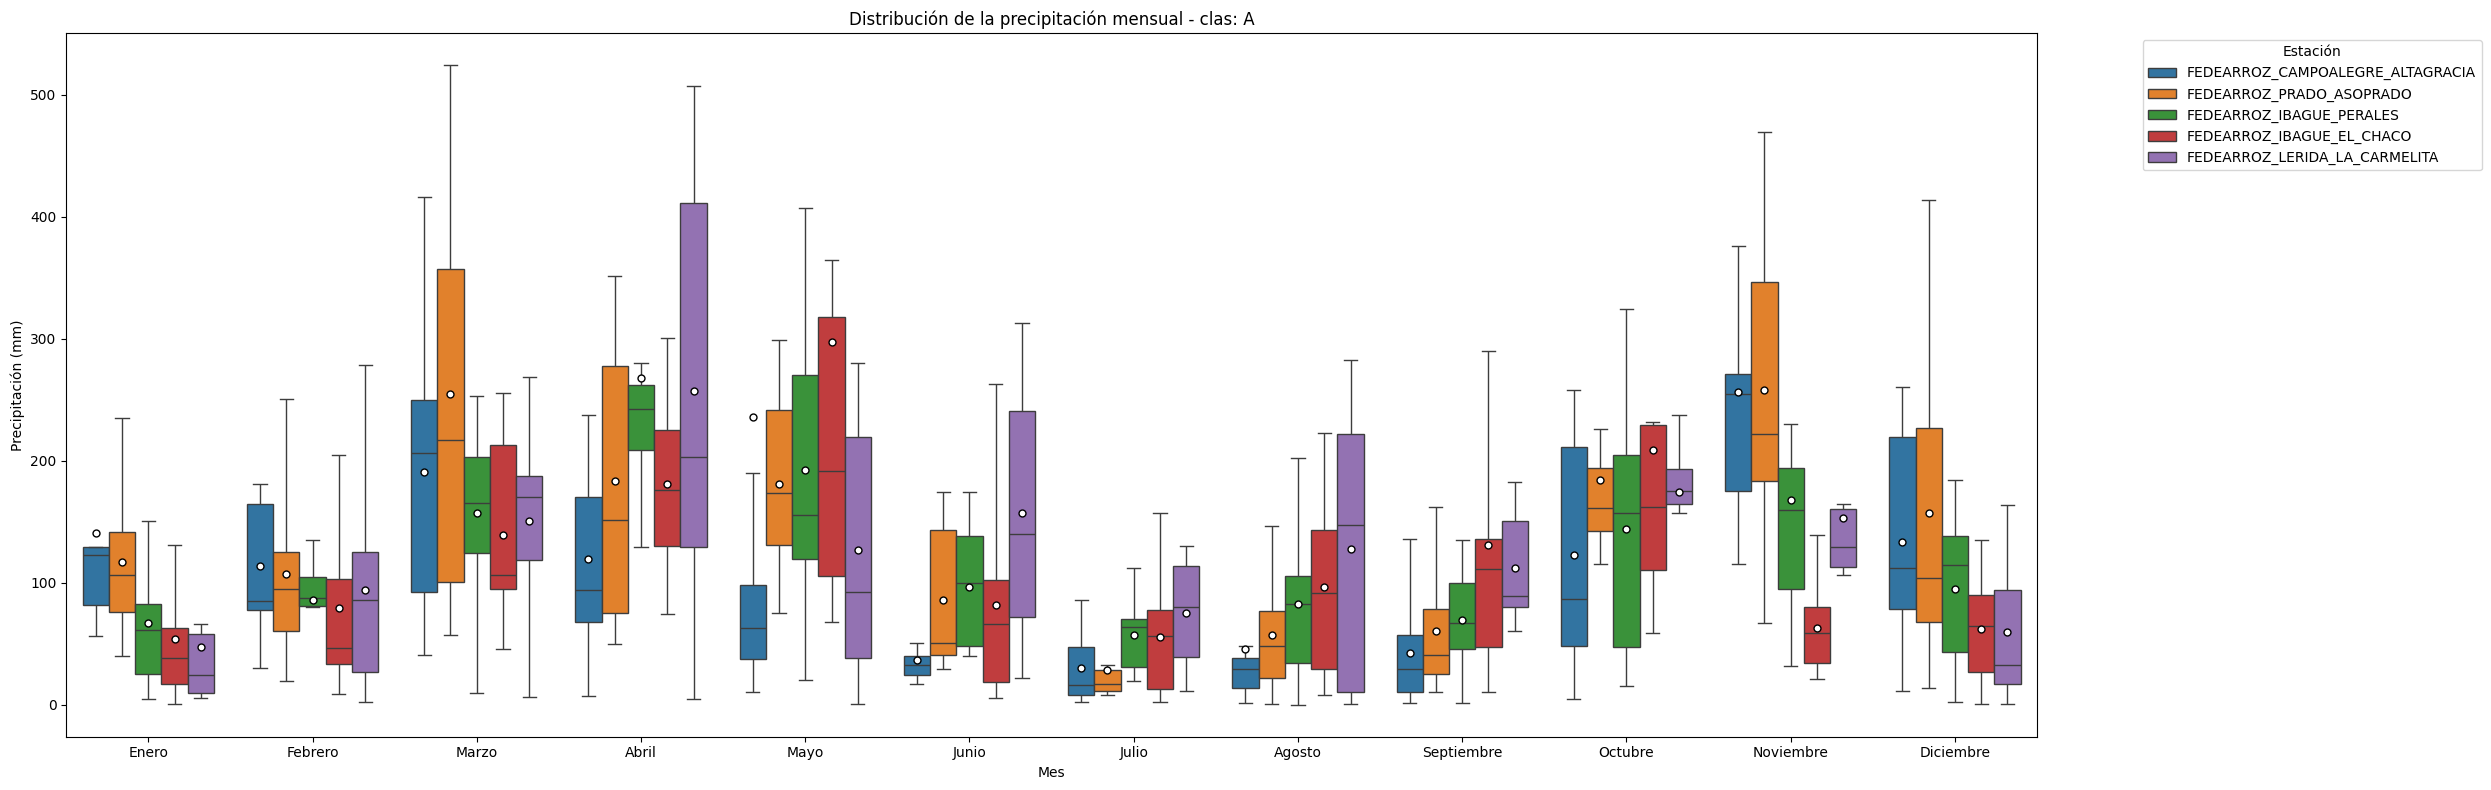

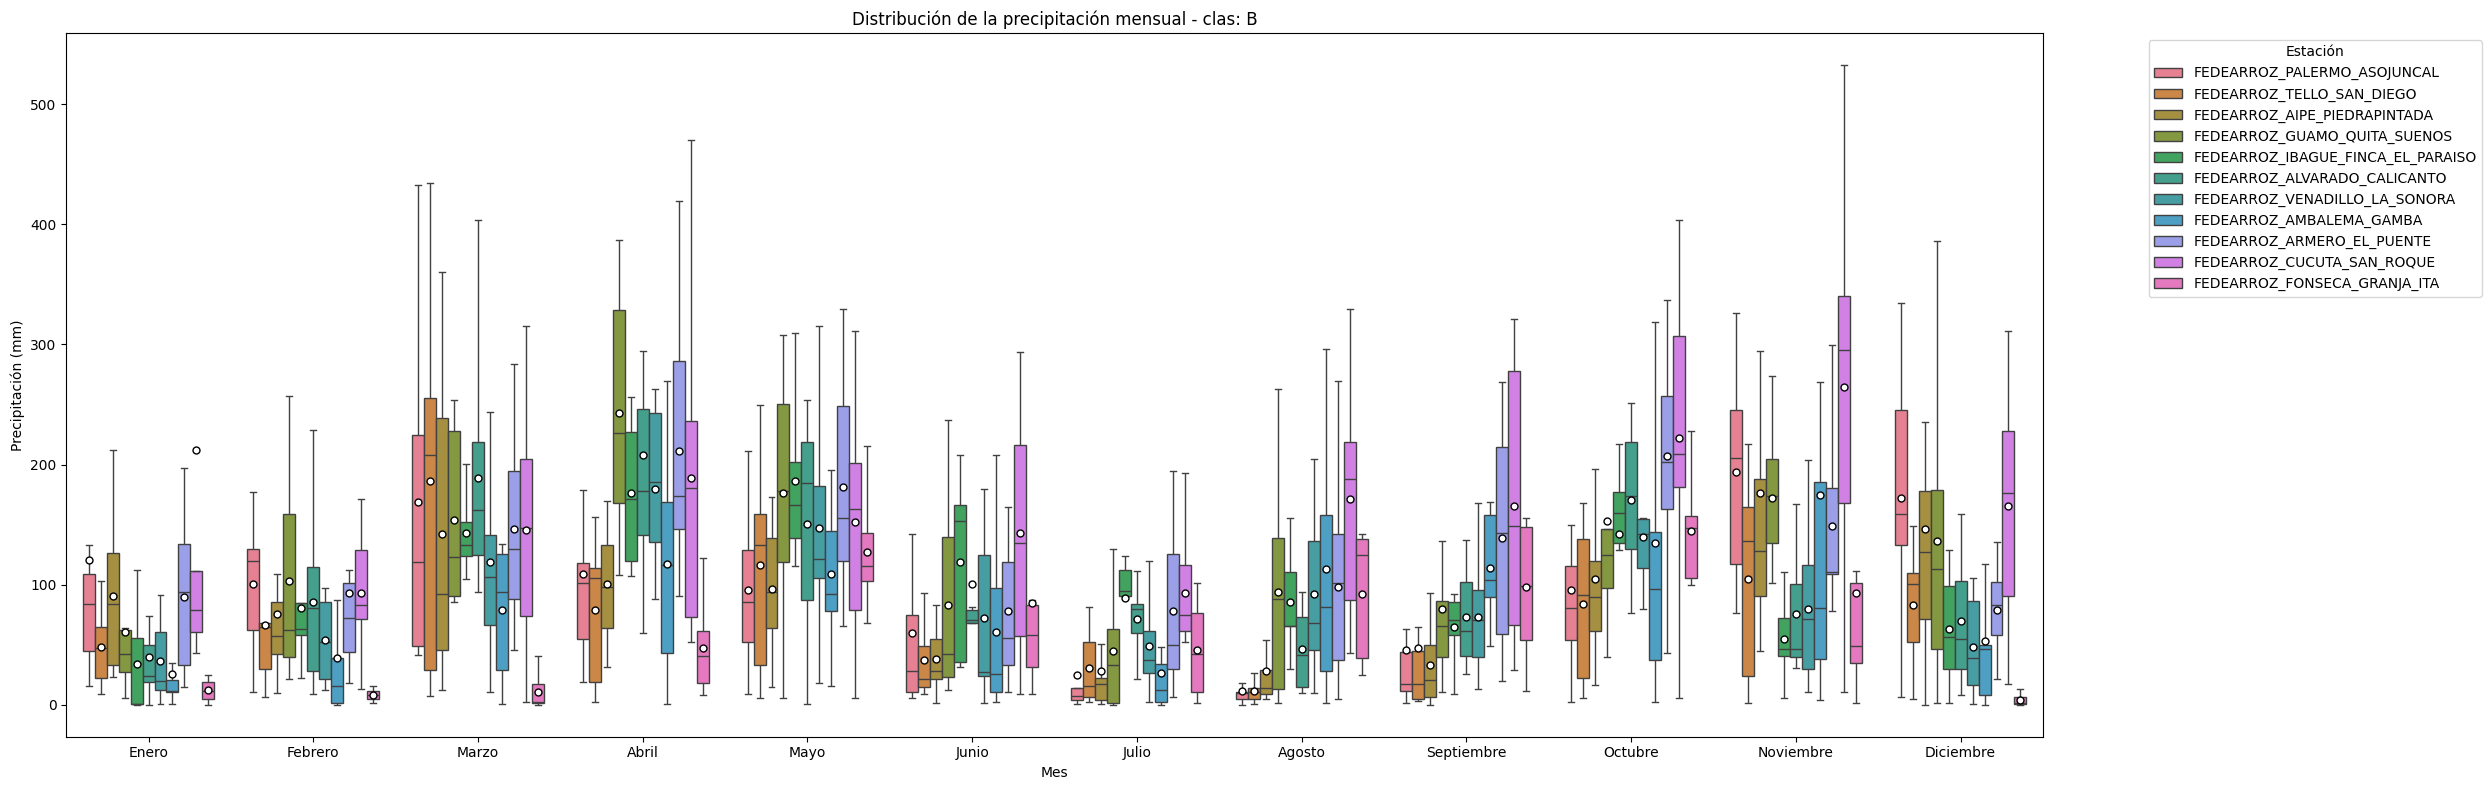

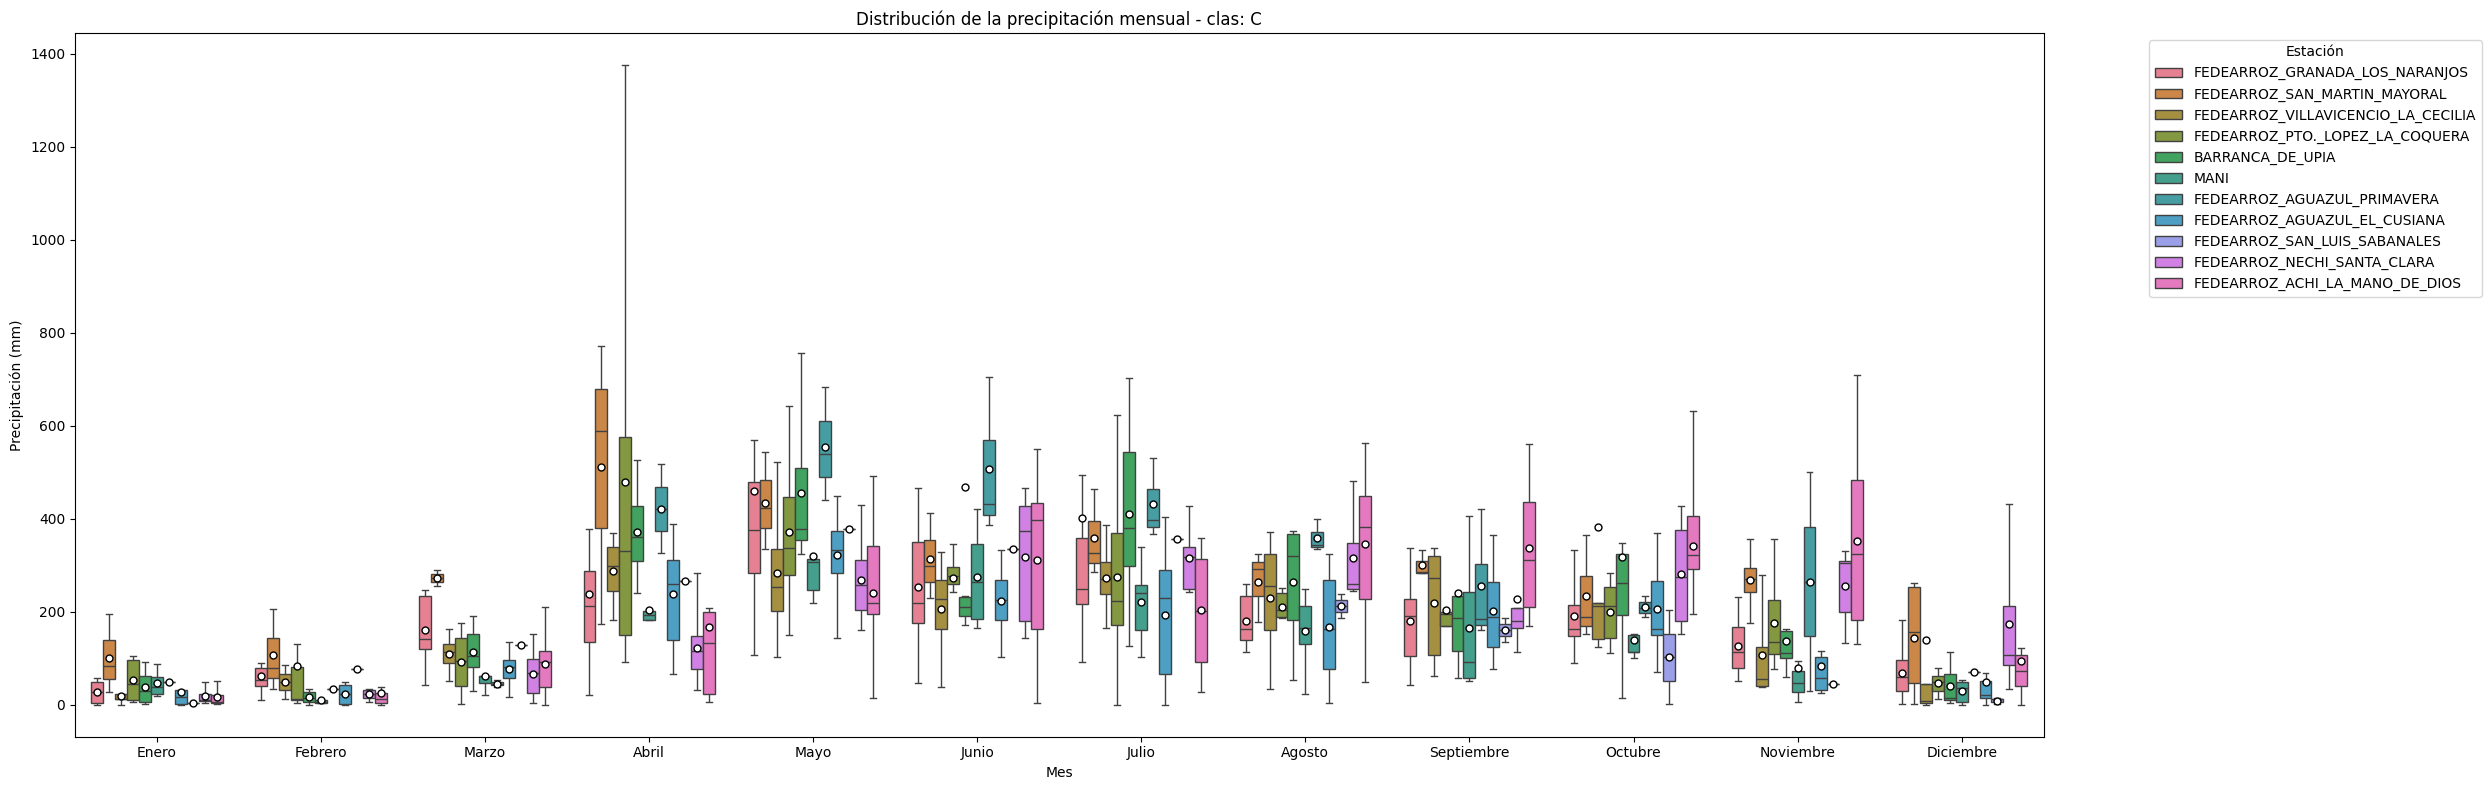

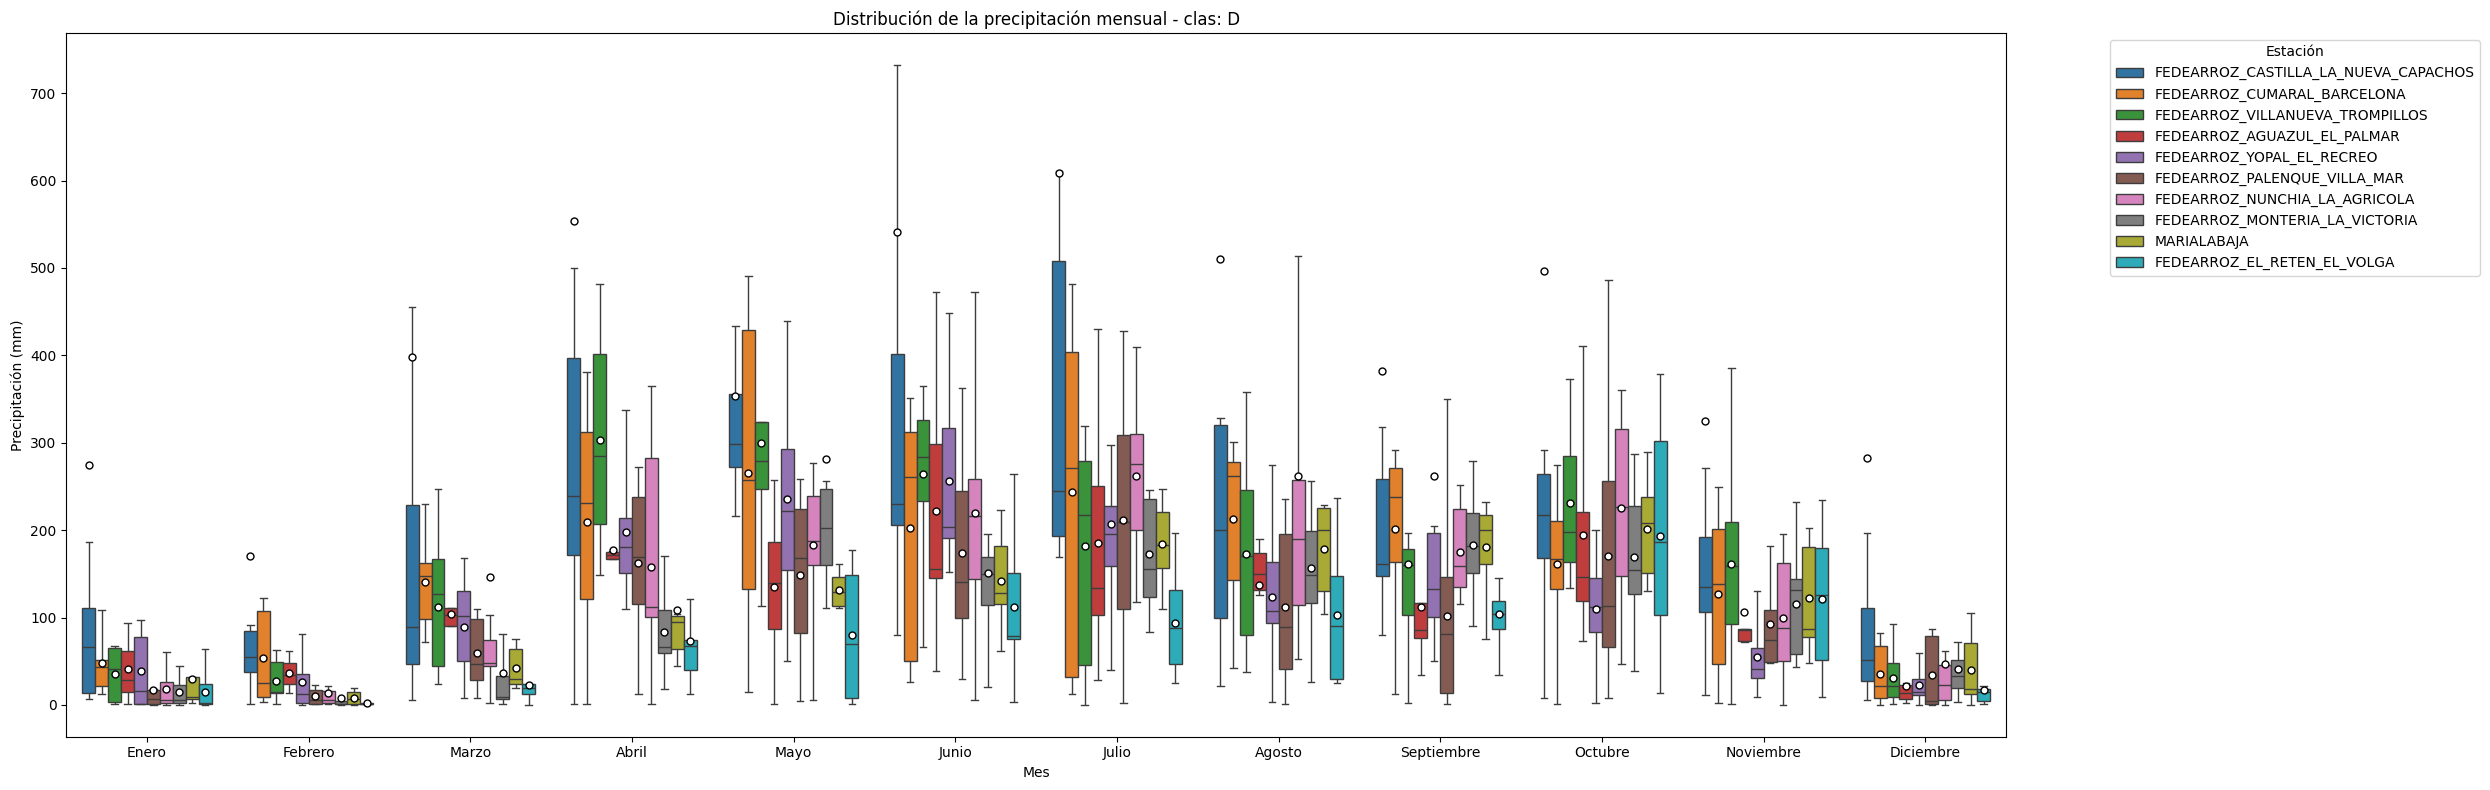

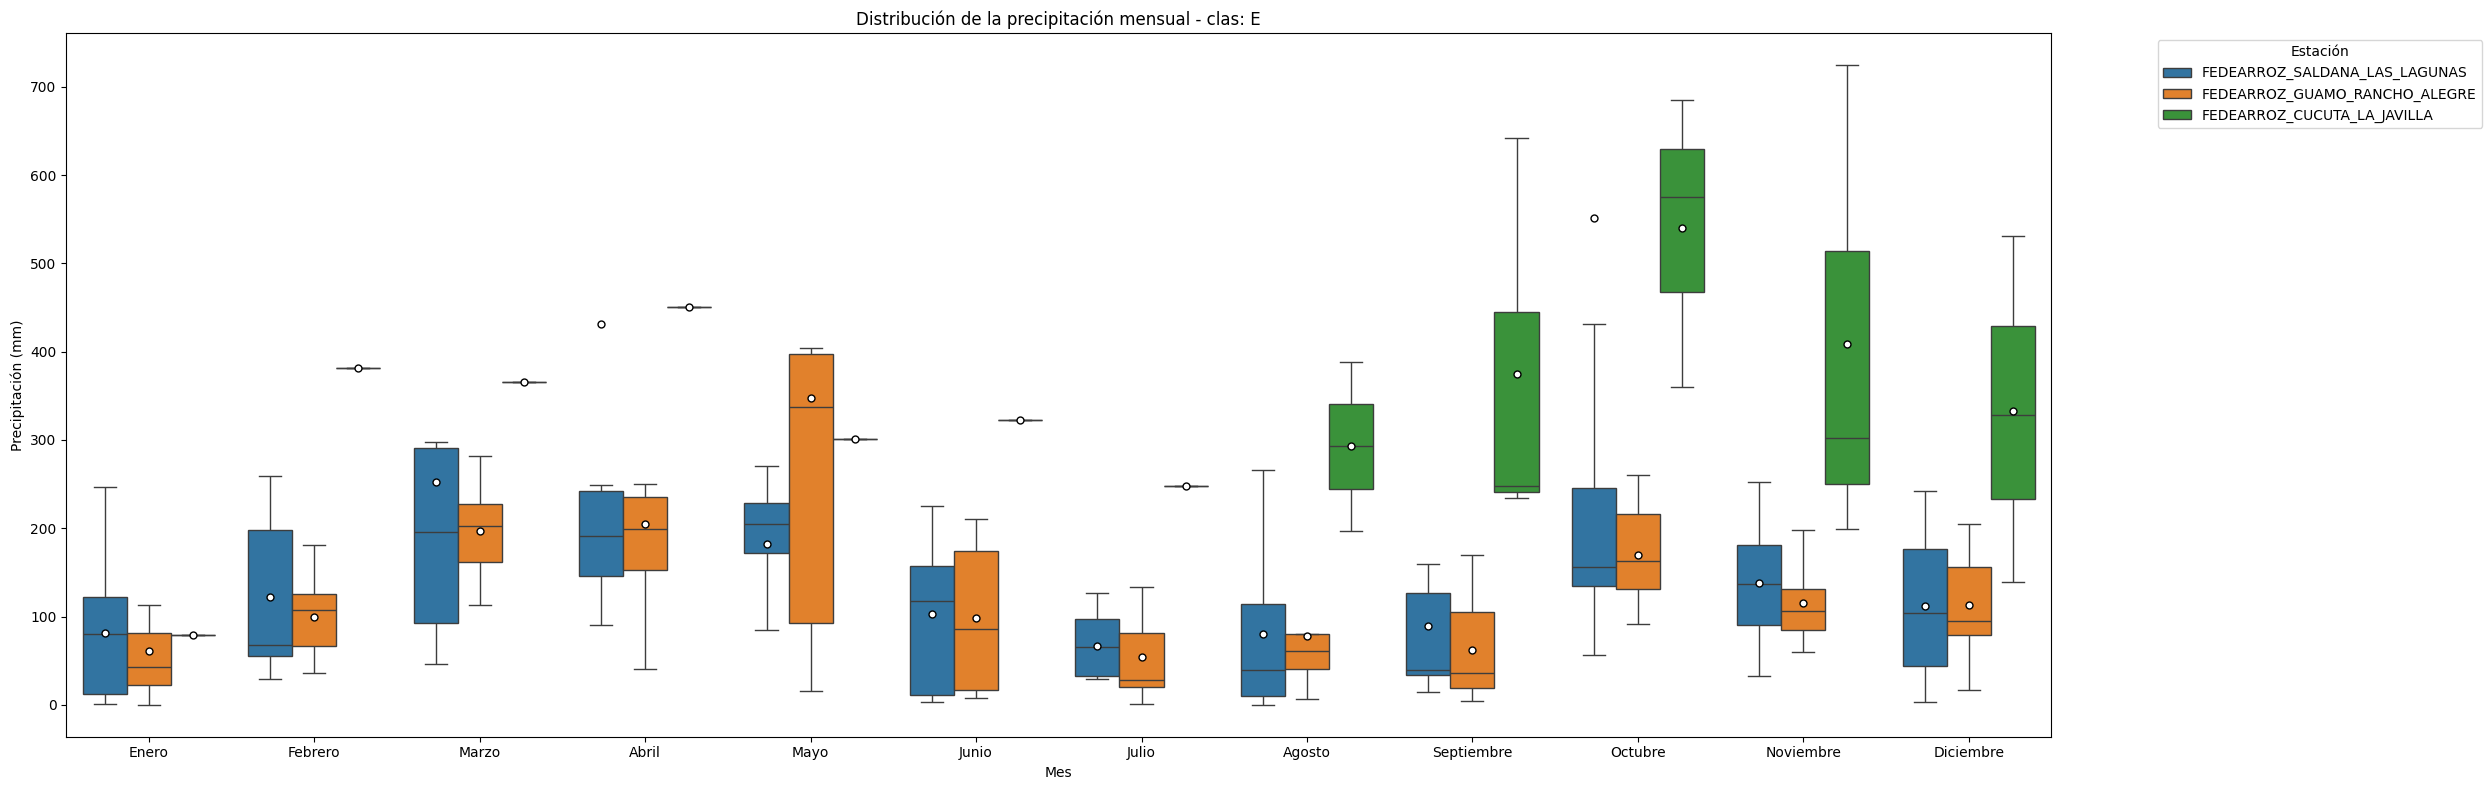

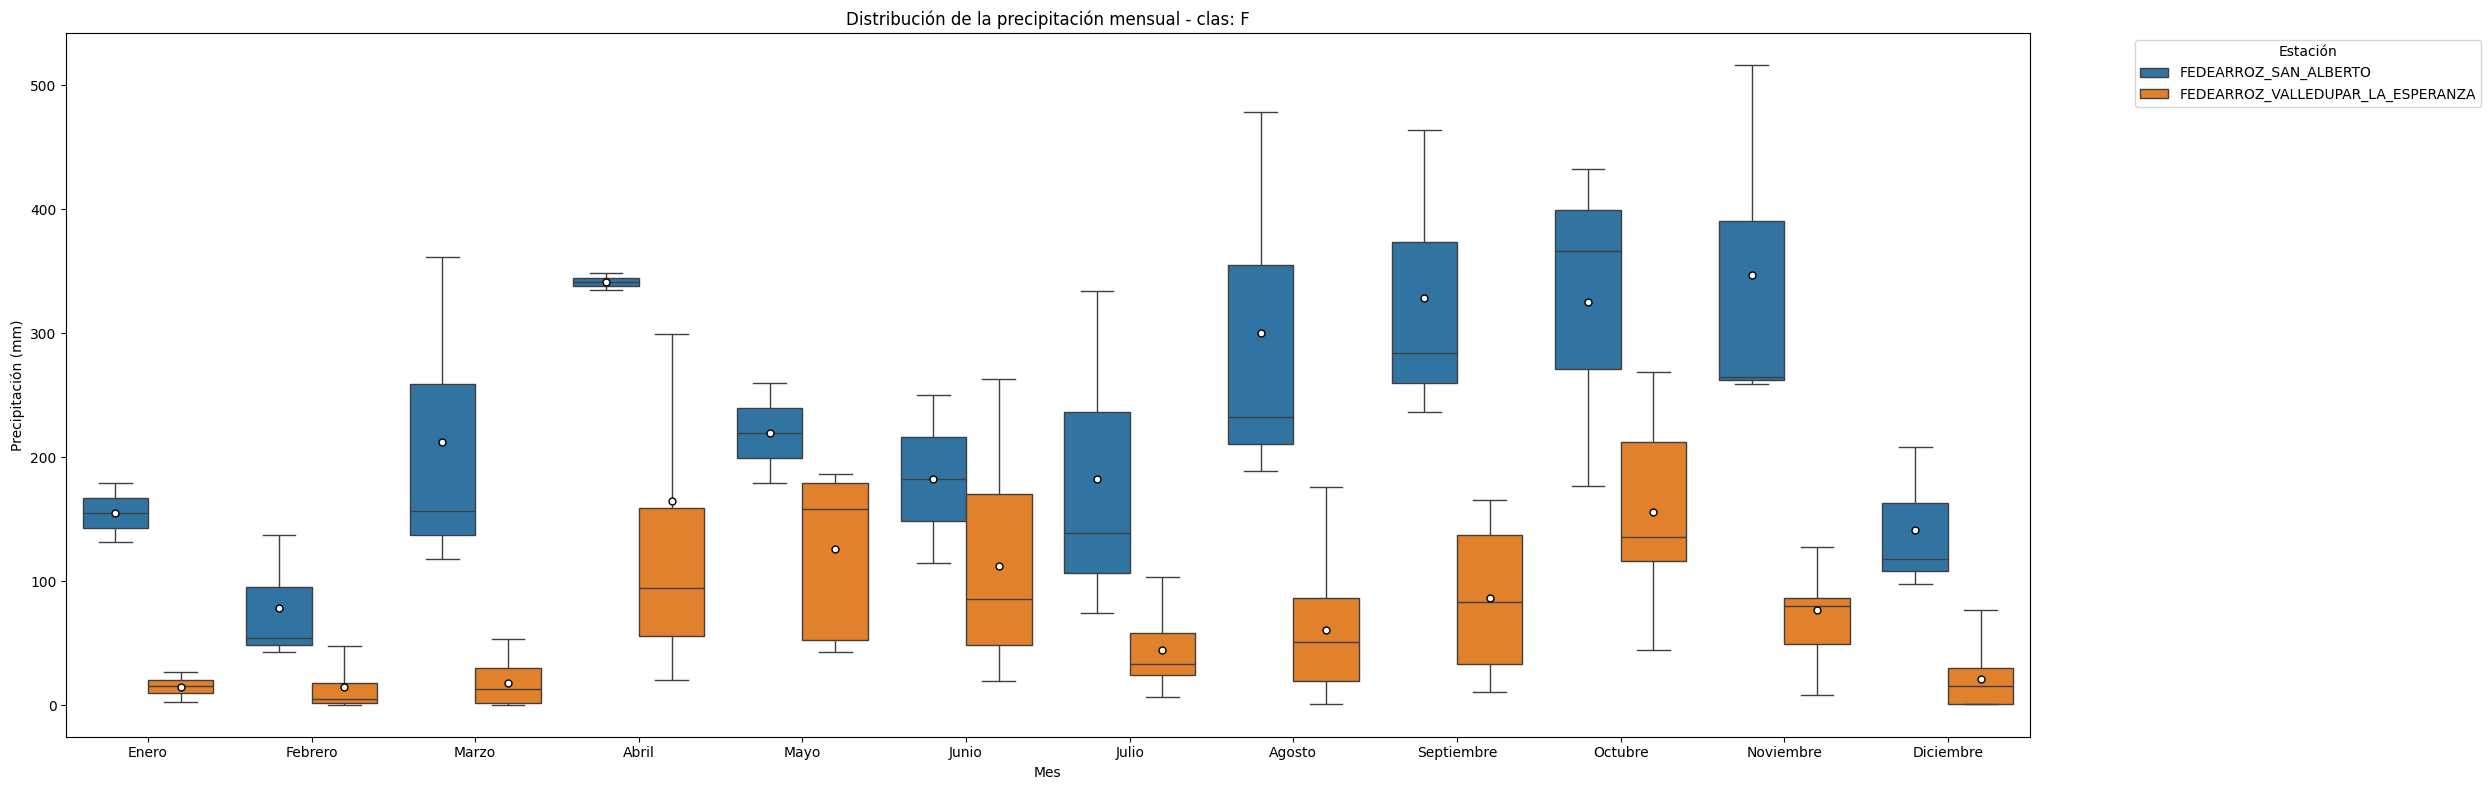

In [14]:
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}


if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())
monthly['mes'] = monthly['month_year'].dt.month.map(meses)

orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
               'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df_fedearroz = monthly[monthly['fuente'] == 'fedearroz']


for clas in df_fedearroz['clasificacion'].unique():
    df_clas = df_fedearroz[df_fedearroz['clasificacion'] == clas]
    
    plt.figure(figsize=(25, 8))
    
   
    ax = sns.boxplot(x='mes', y='prec_month', hue='station', data=df_clas, whis=2, showfliers=False, 
                     order=orden_meses,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "black",
                       "markerfacecolor":"white",
                       "markersize": "5"},dodge=True)  
    
    
    
    plt.title(f'Distribución de la precipitación mensual - clas: {clas}')
    plt.xlabel('Mes')
    plt.ylabel('Precipitación (mm)')
    
   
    plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


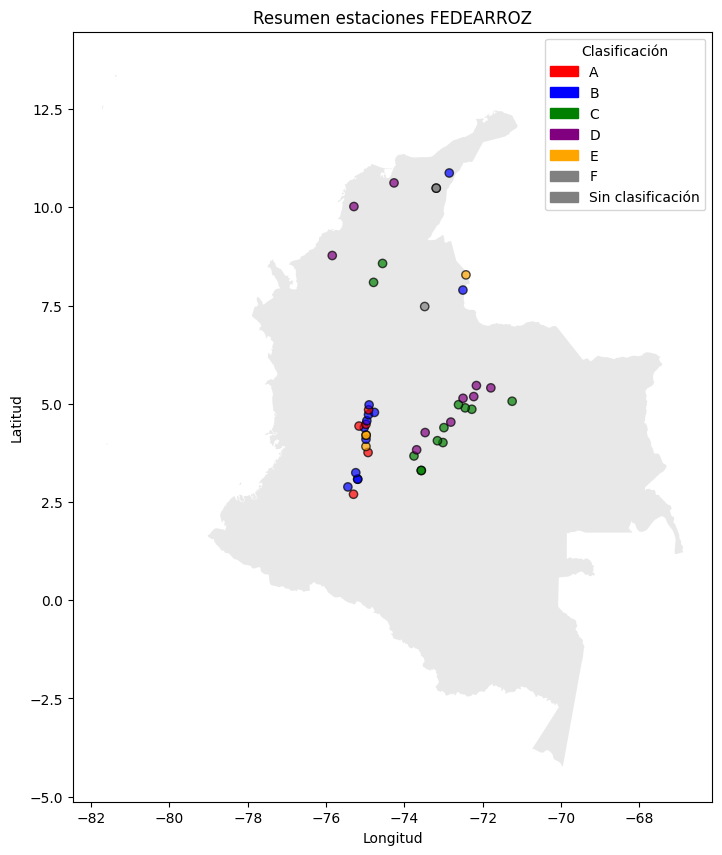

In [15]:

monthly_unique = monthly.drop_duplicates(subset=['latitud', 'longitud'])
color_dict = {
    'A': 'red',
    'B': 'blue',
    'C': 'green',
    'D': 'purple',
    'E': 'orange',
    'F': 'gray'
}


monthly_unique['color'] = monthly_unique['clasificacion'].map(color_dict).fillna('gray')

gdf_merged = gpd.GeoDataFrame(monthly_unique, geometry=gpd.points_from_xy(monthly_unique.longitud, monthly_unique.latitud))


shapefile_path = 'maps/ne_10m_admin_0_countries.shp' 
world = gpd.read_file(shapefile_path)
colombia = world[world['ADMIN'] == 'Colombia']

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='lightgray', alpha=0.5)  
sc = ax.scatter(
    gdf_merged.geometry.x, gdf_merged.geometry.y,
    c=gdf_merged['color'],  
    alpha=0.7,
    edgecolor='k'
)


import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color, label=clas) for clas, color in color_dict.items()]
handles.append(mpatches.Patch(color='gray', label='Sin clasificación'))
ax.legend(handles=handles, title='Clasificación')


plt.title('Resumen estaciones FEDEARROZ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()



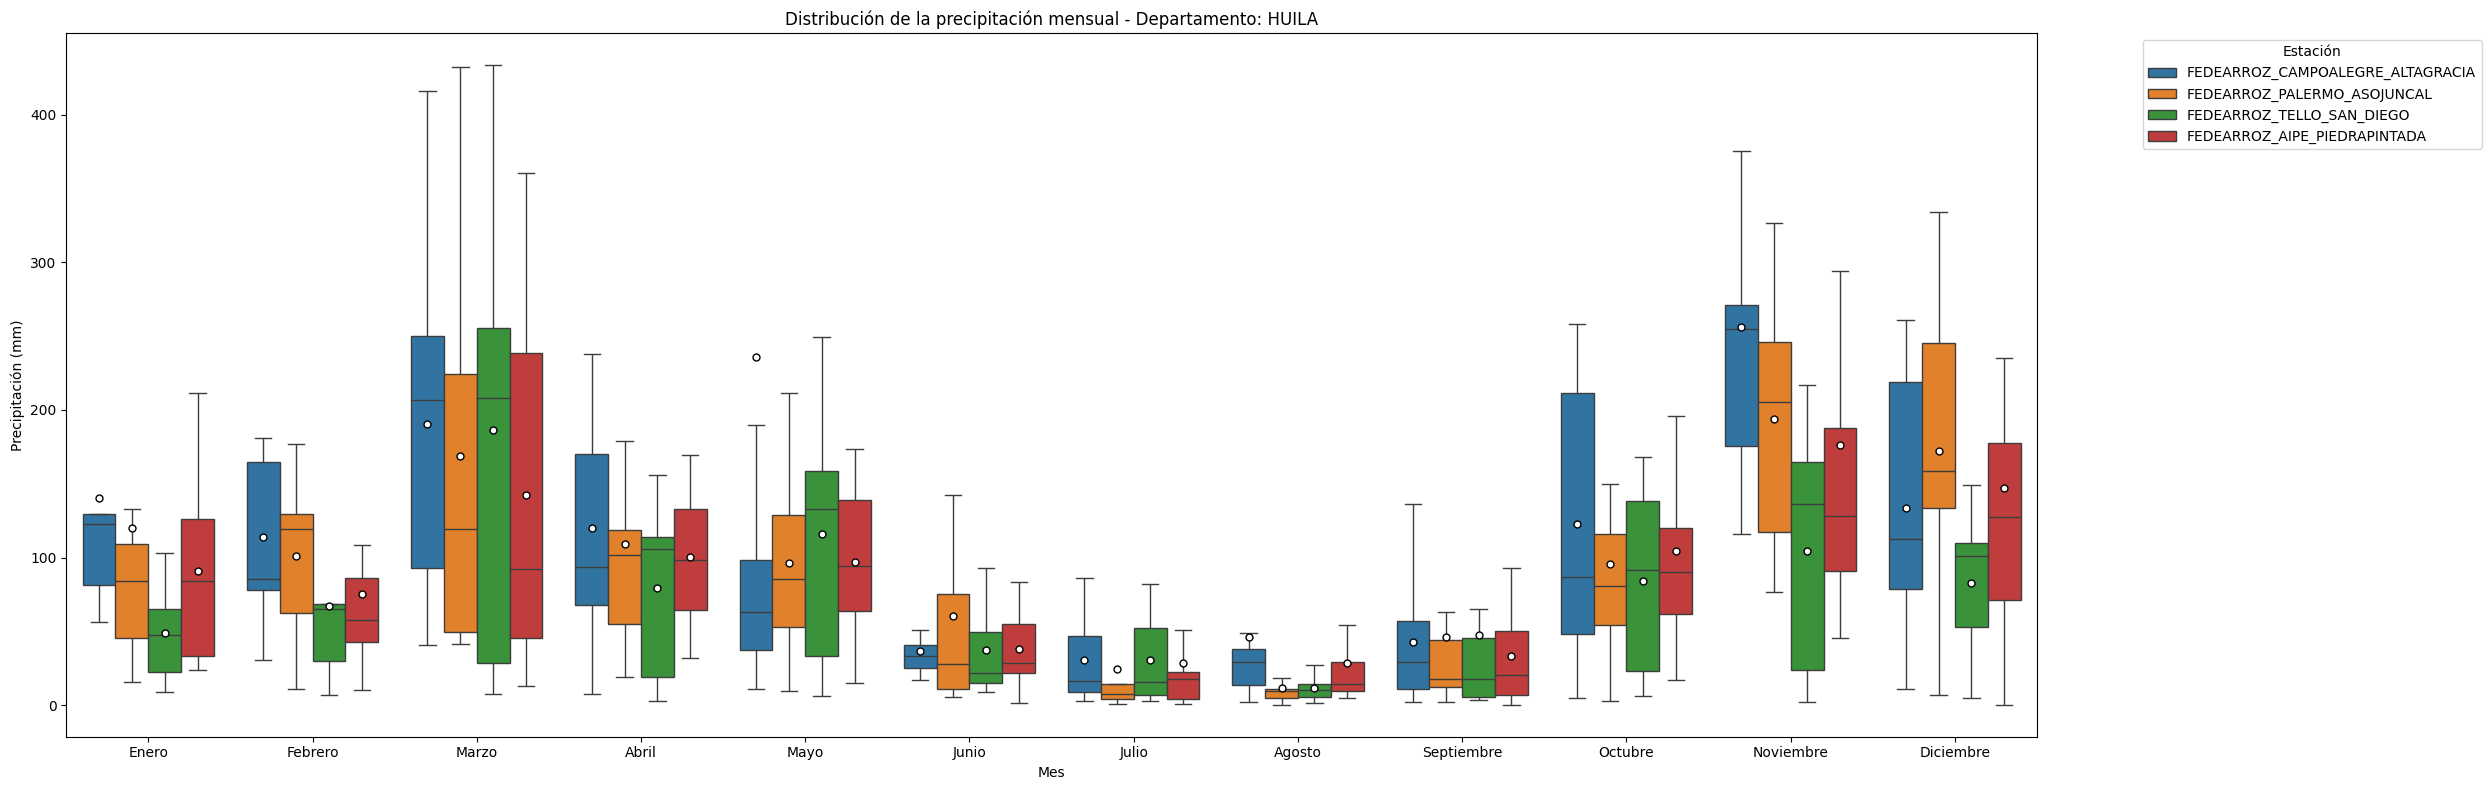

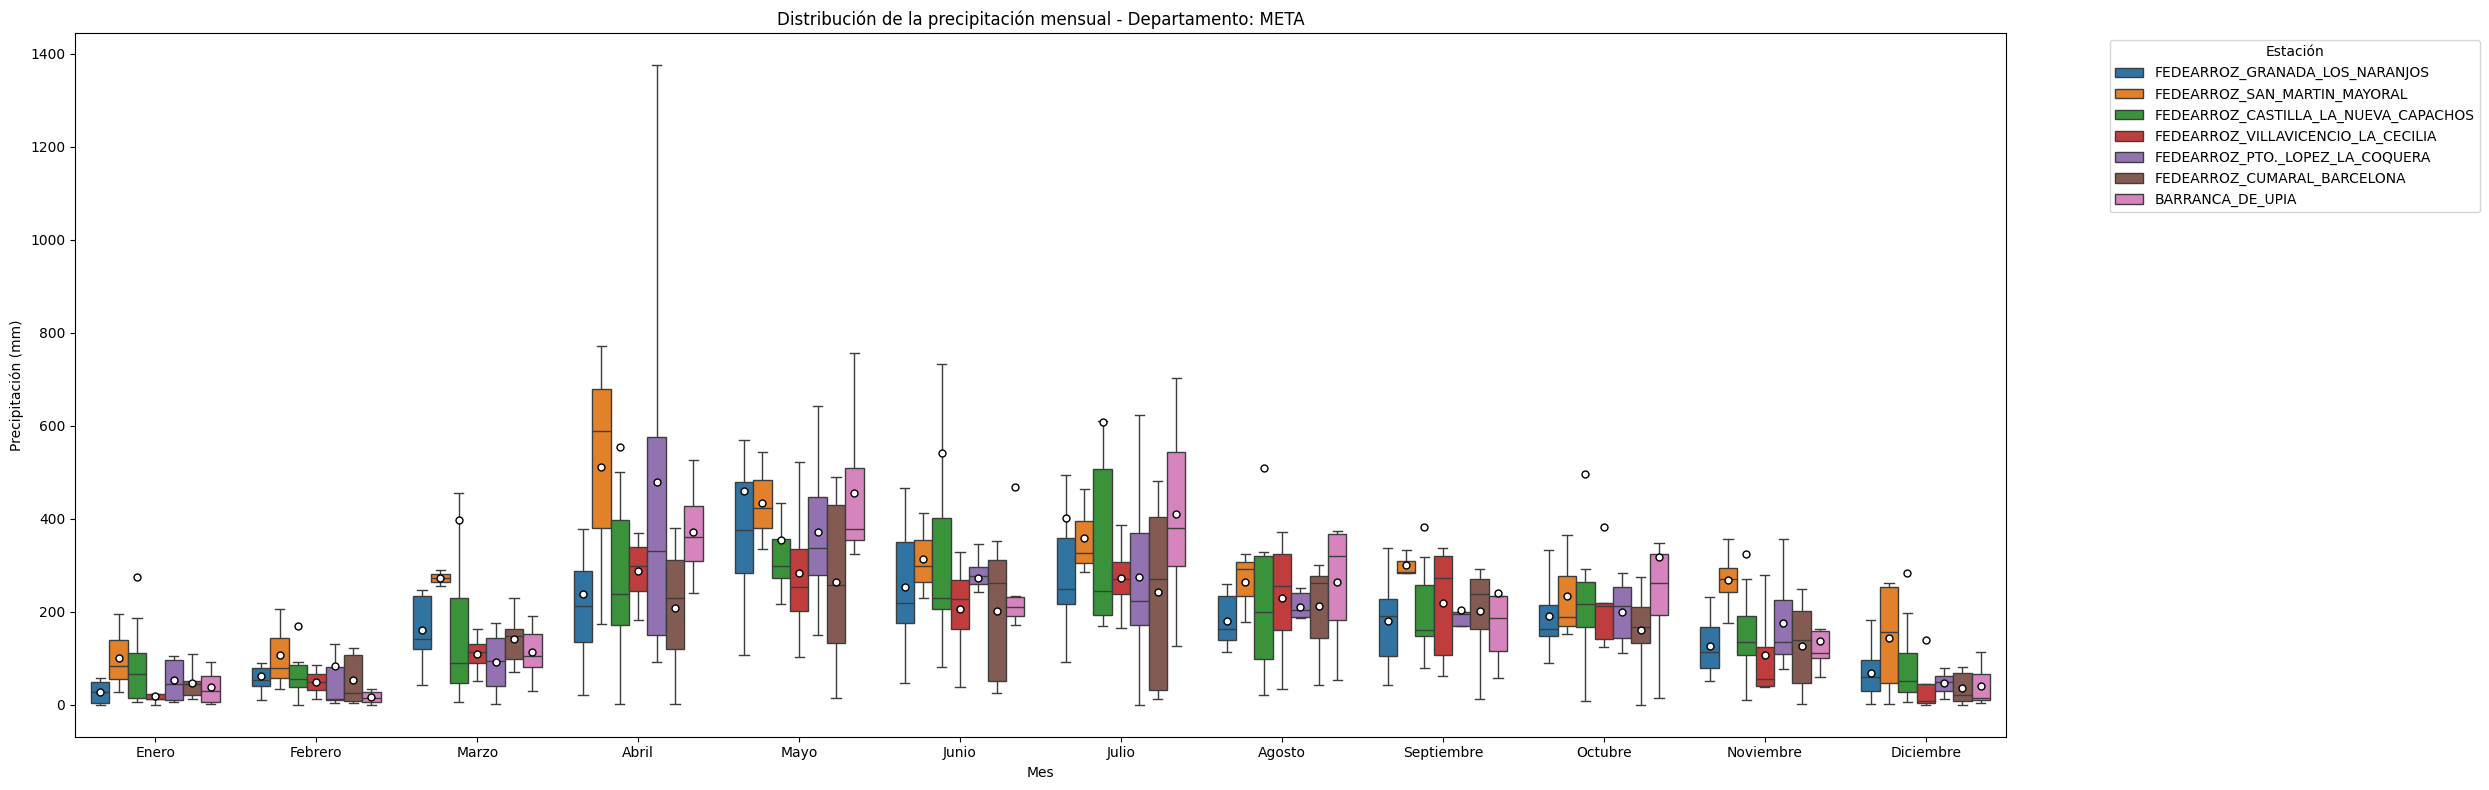

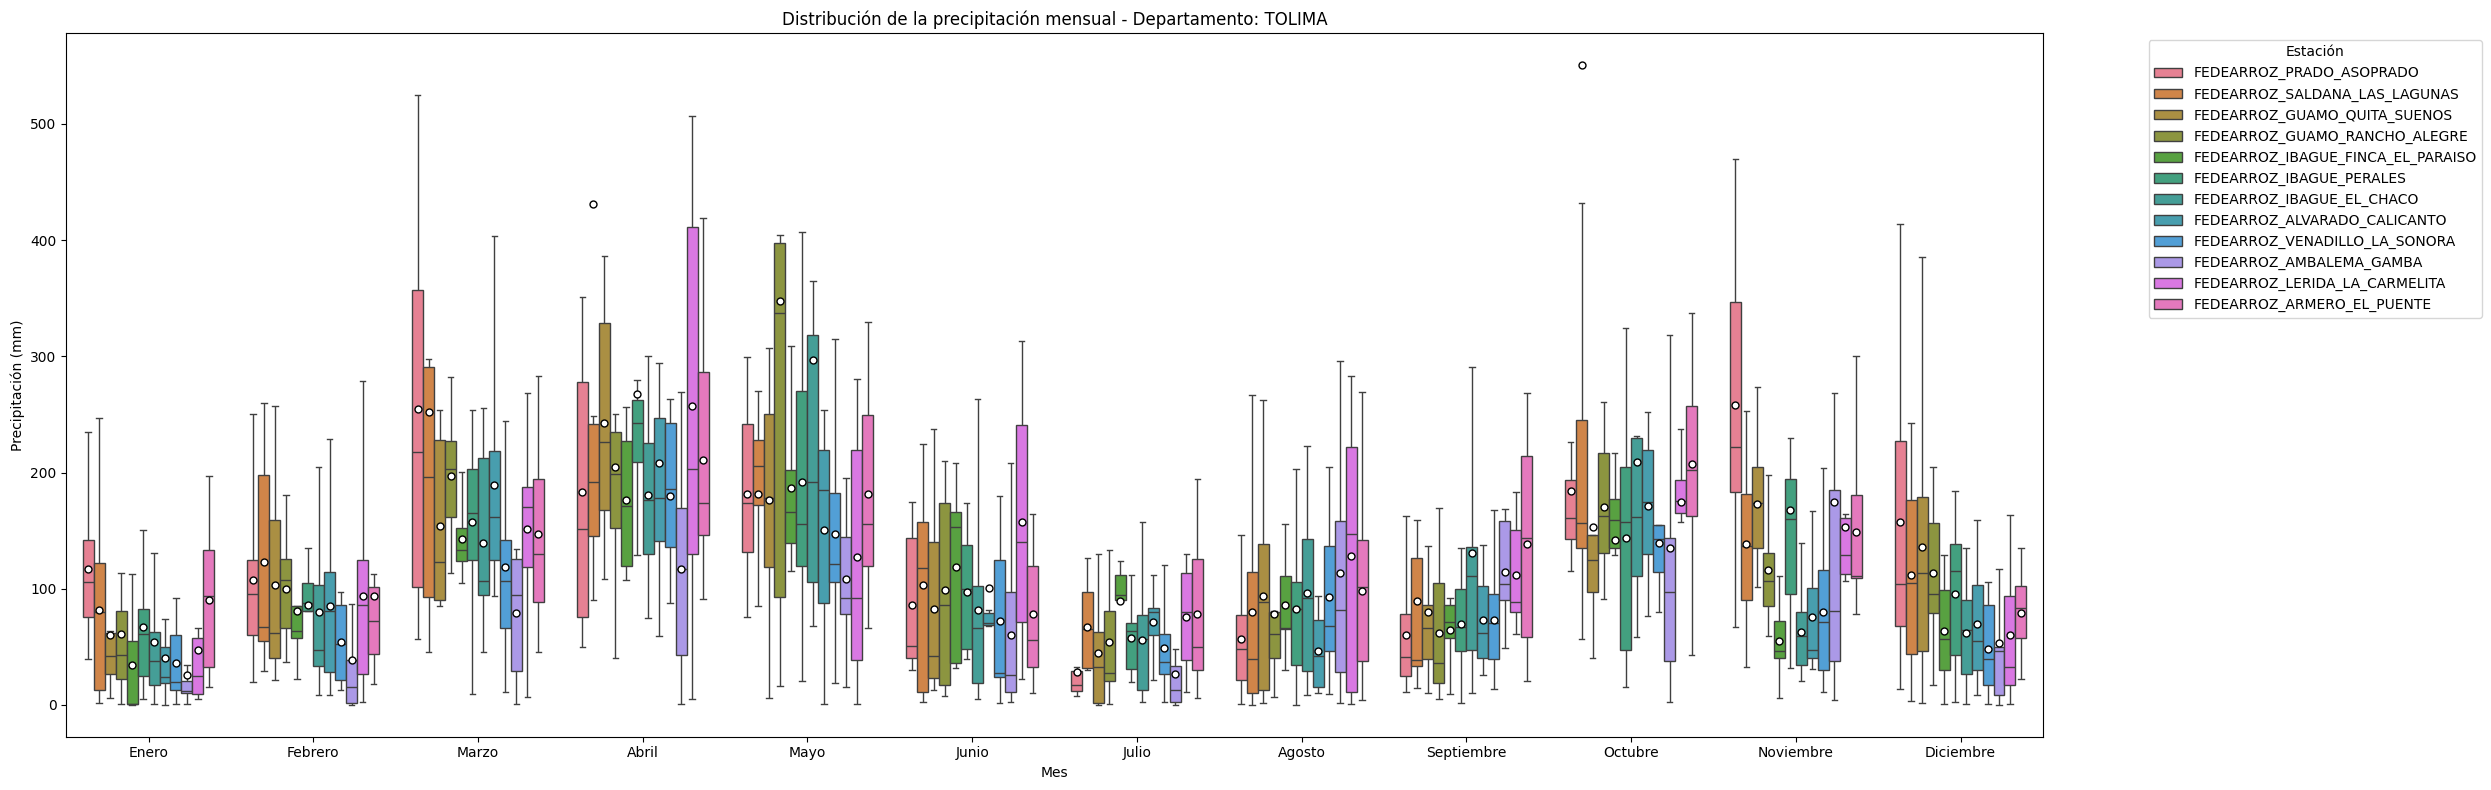

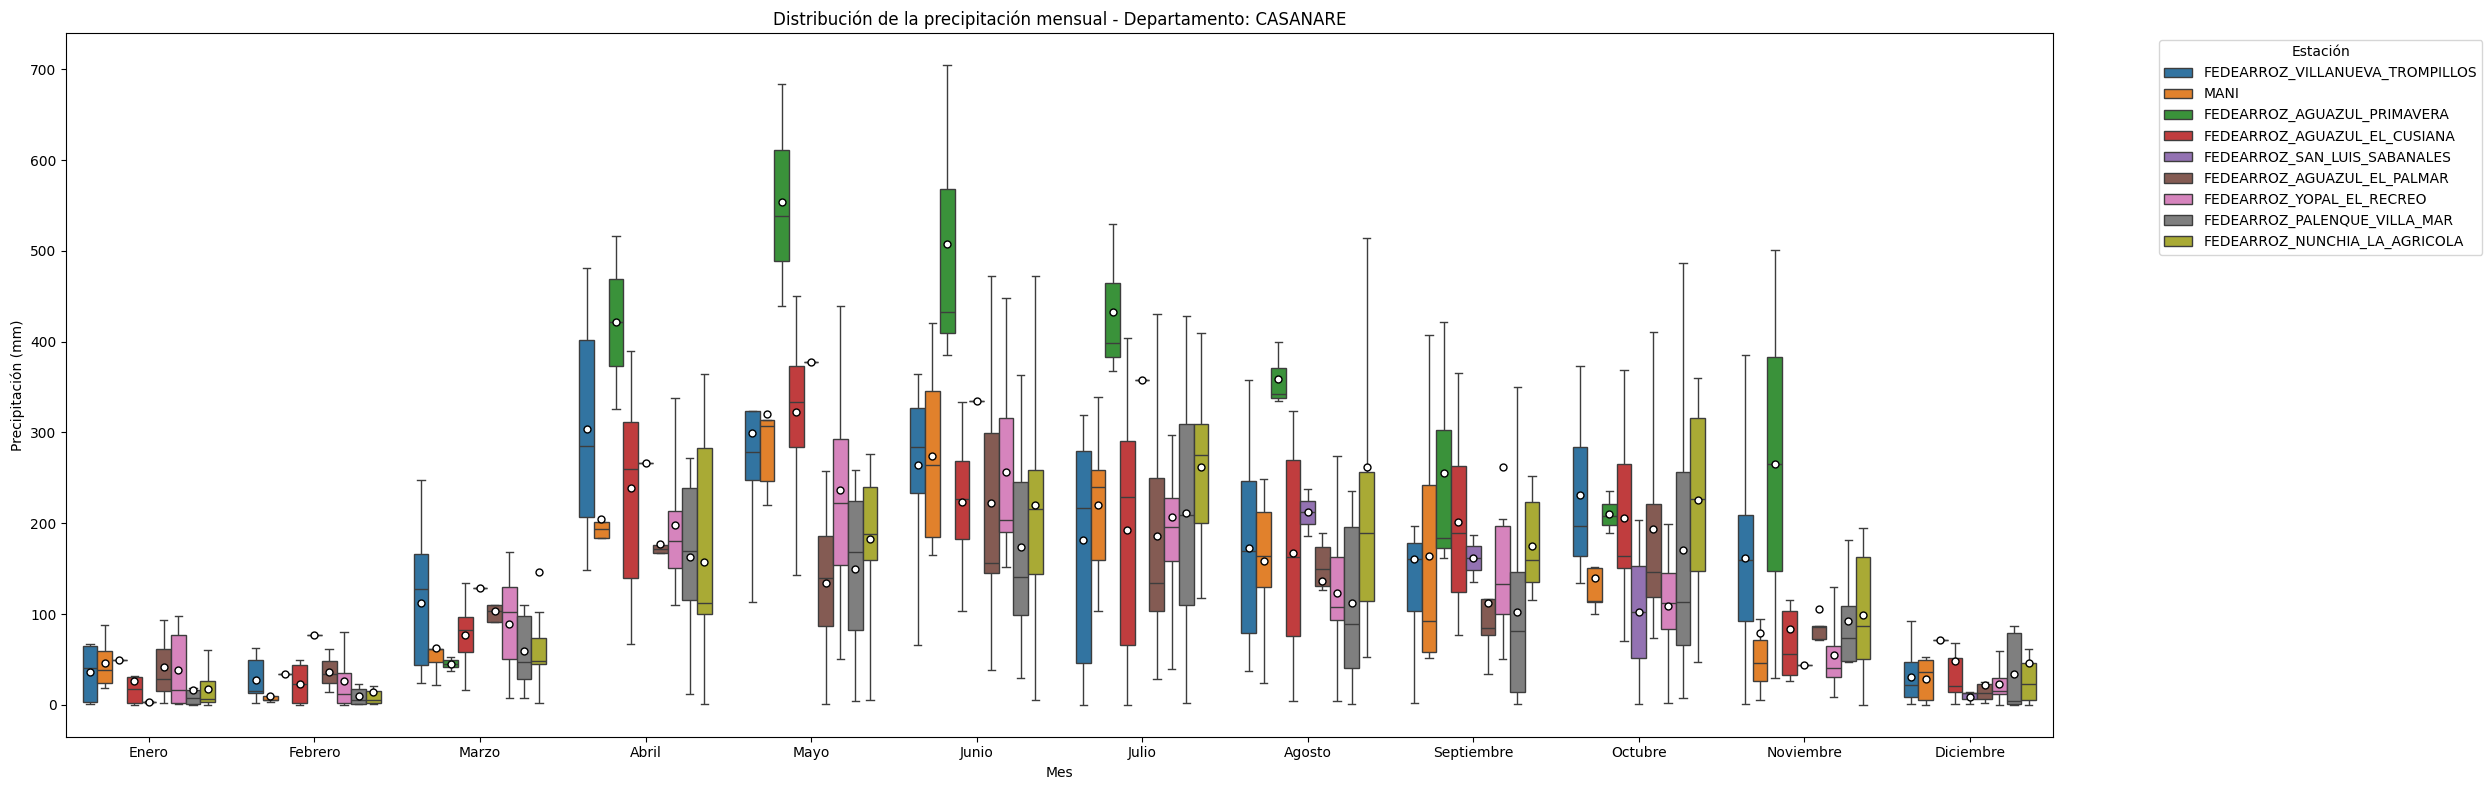

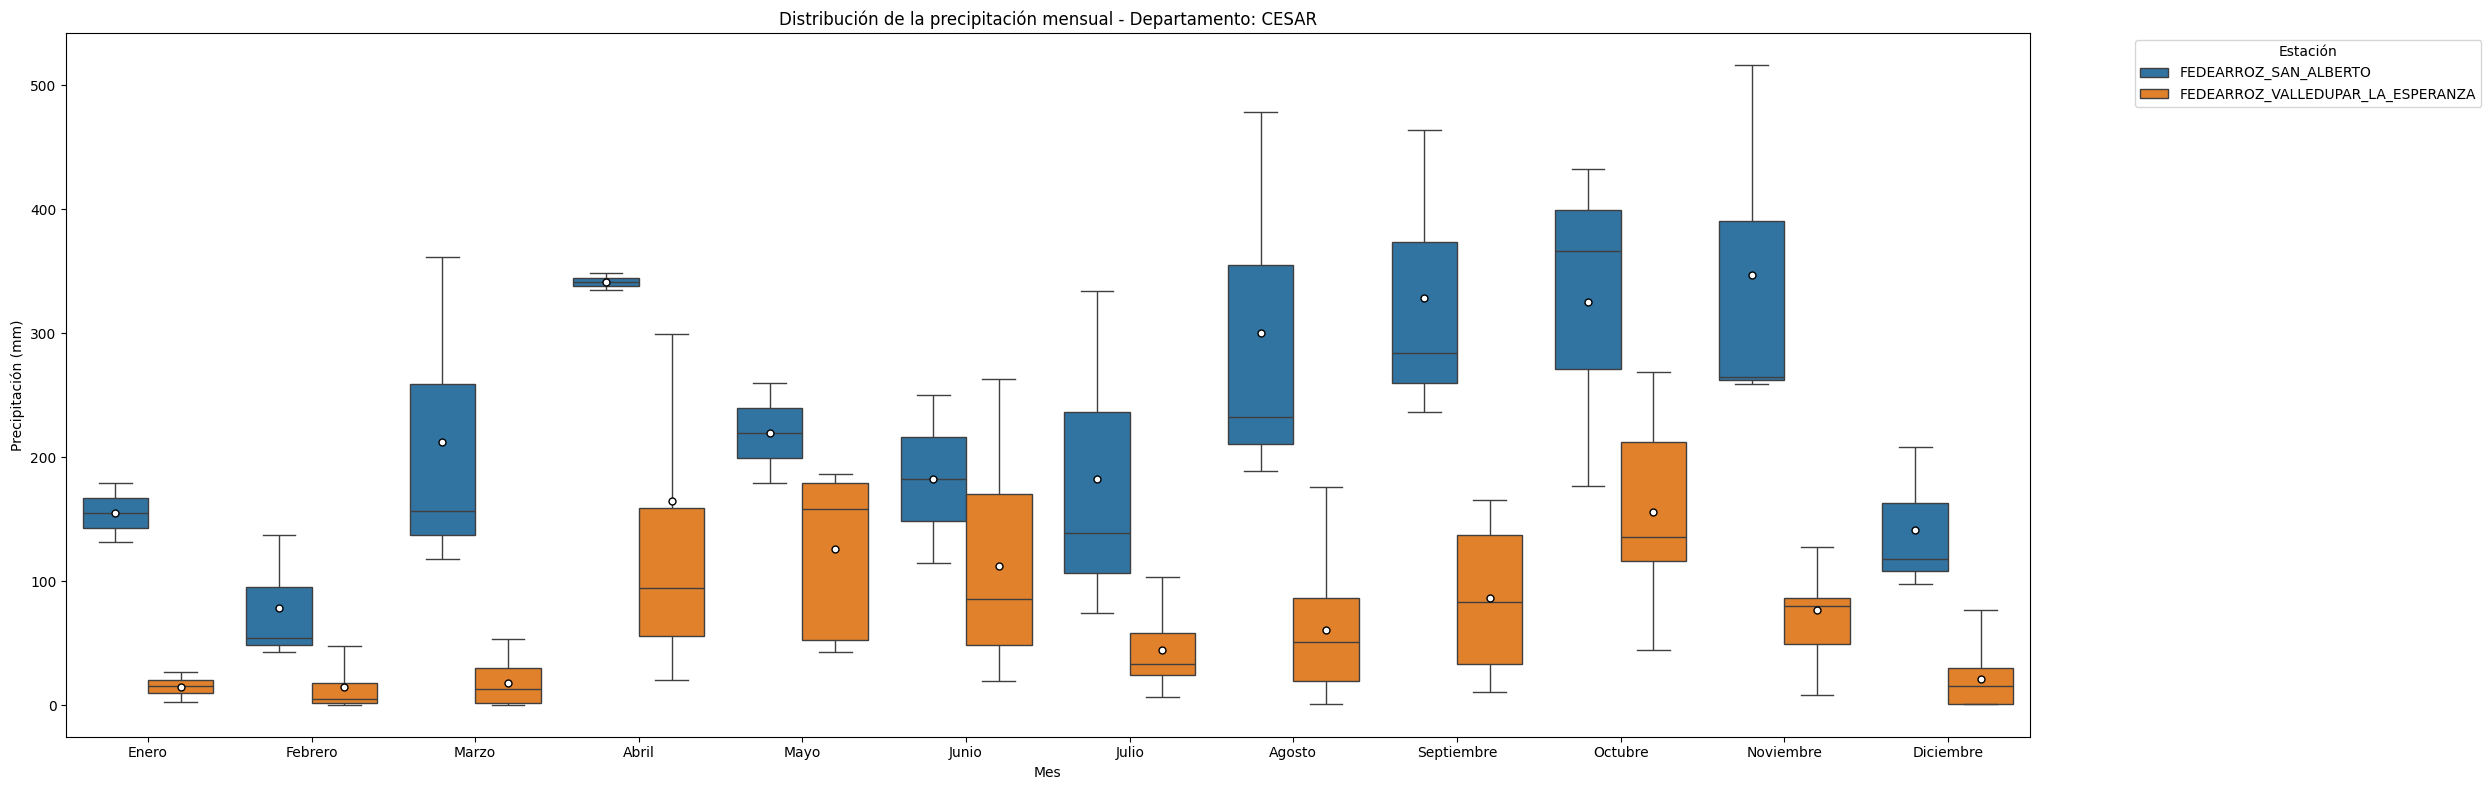

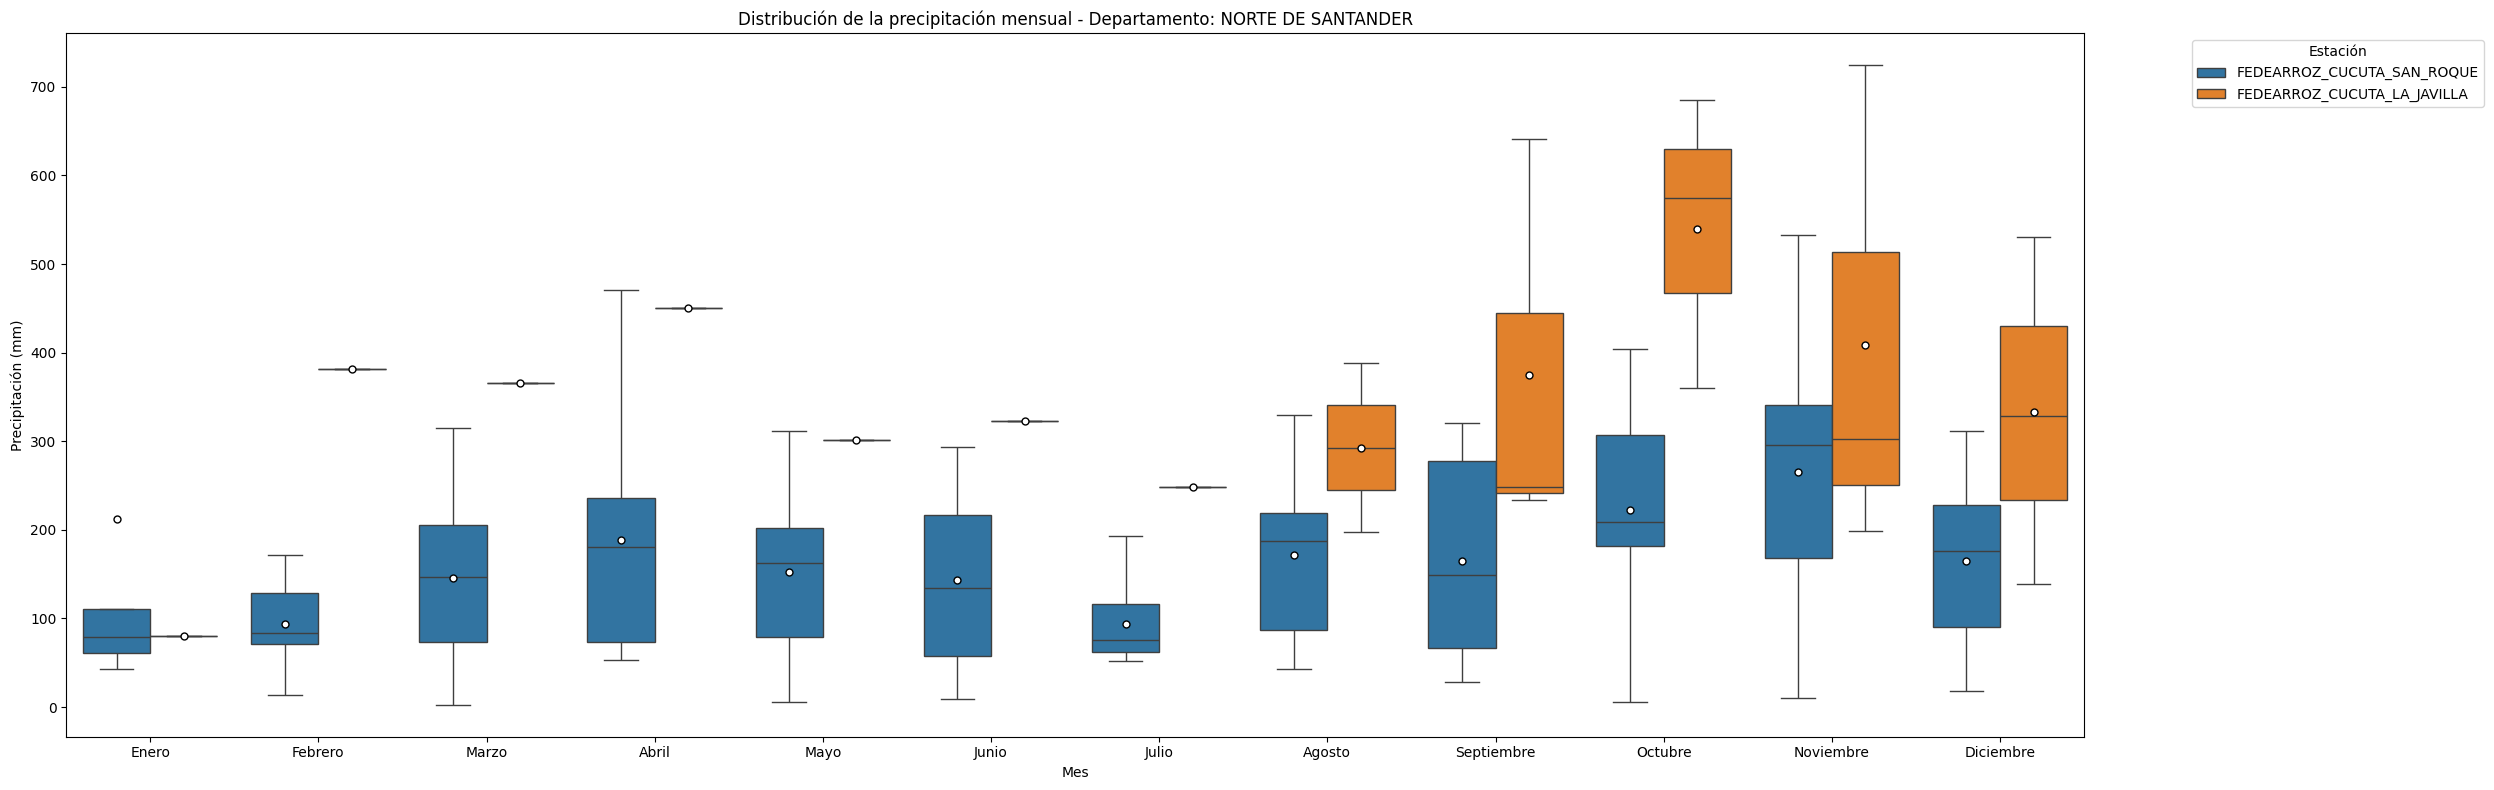

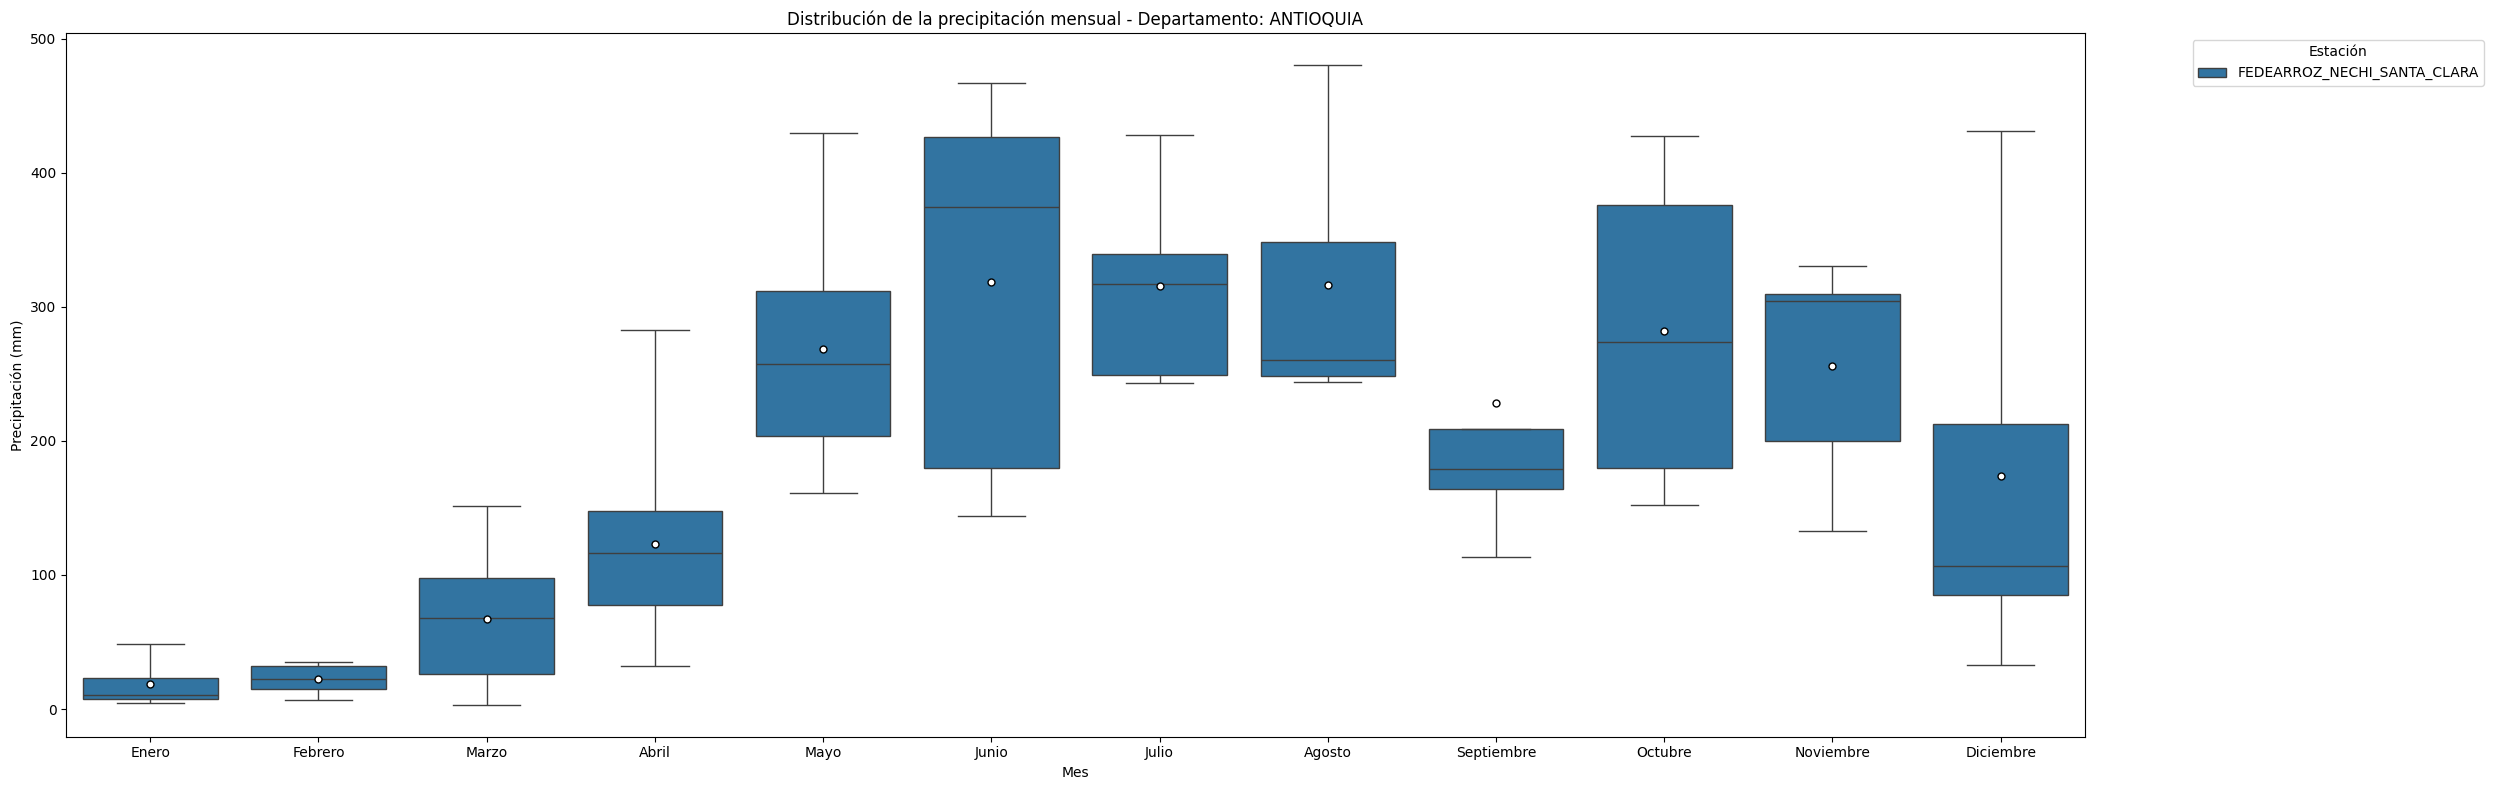

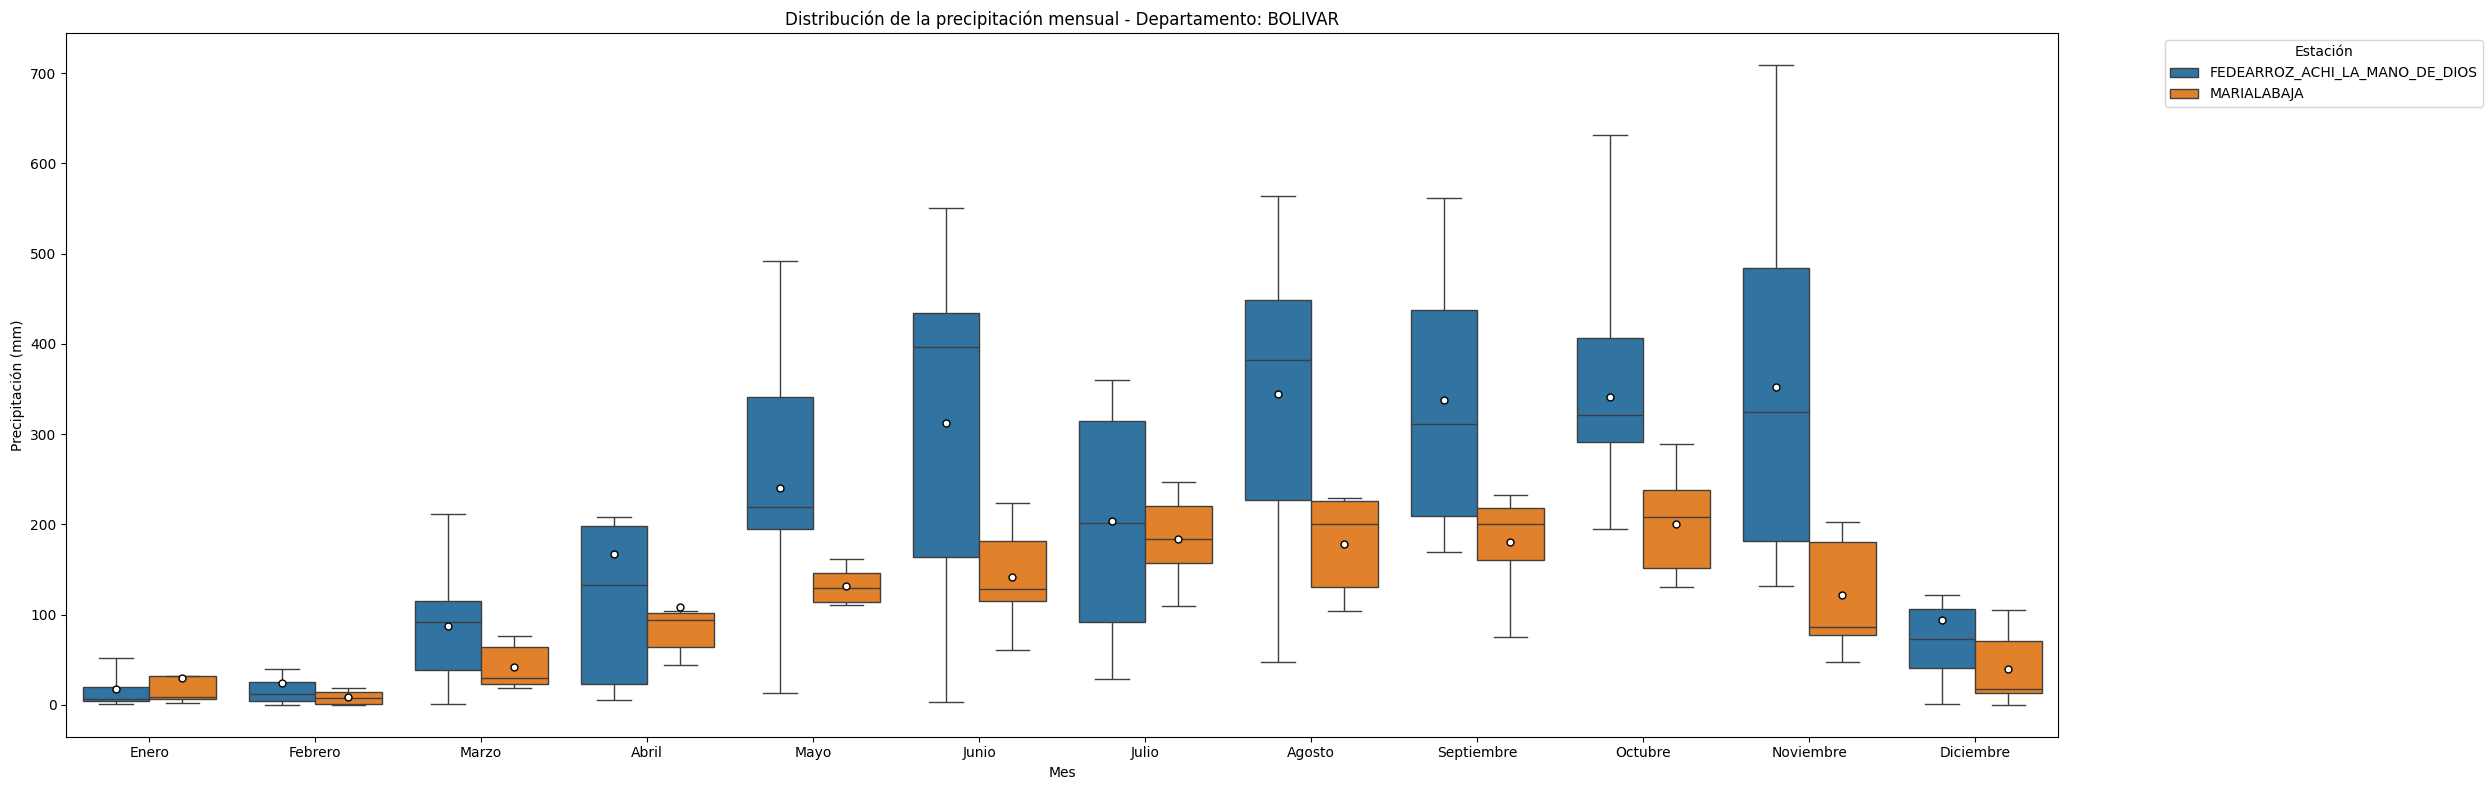

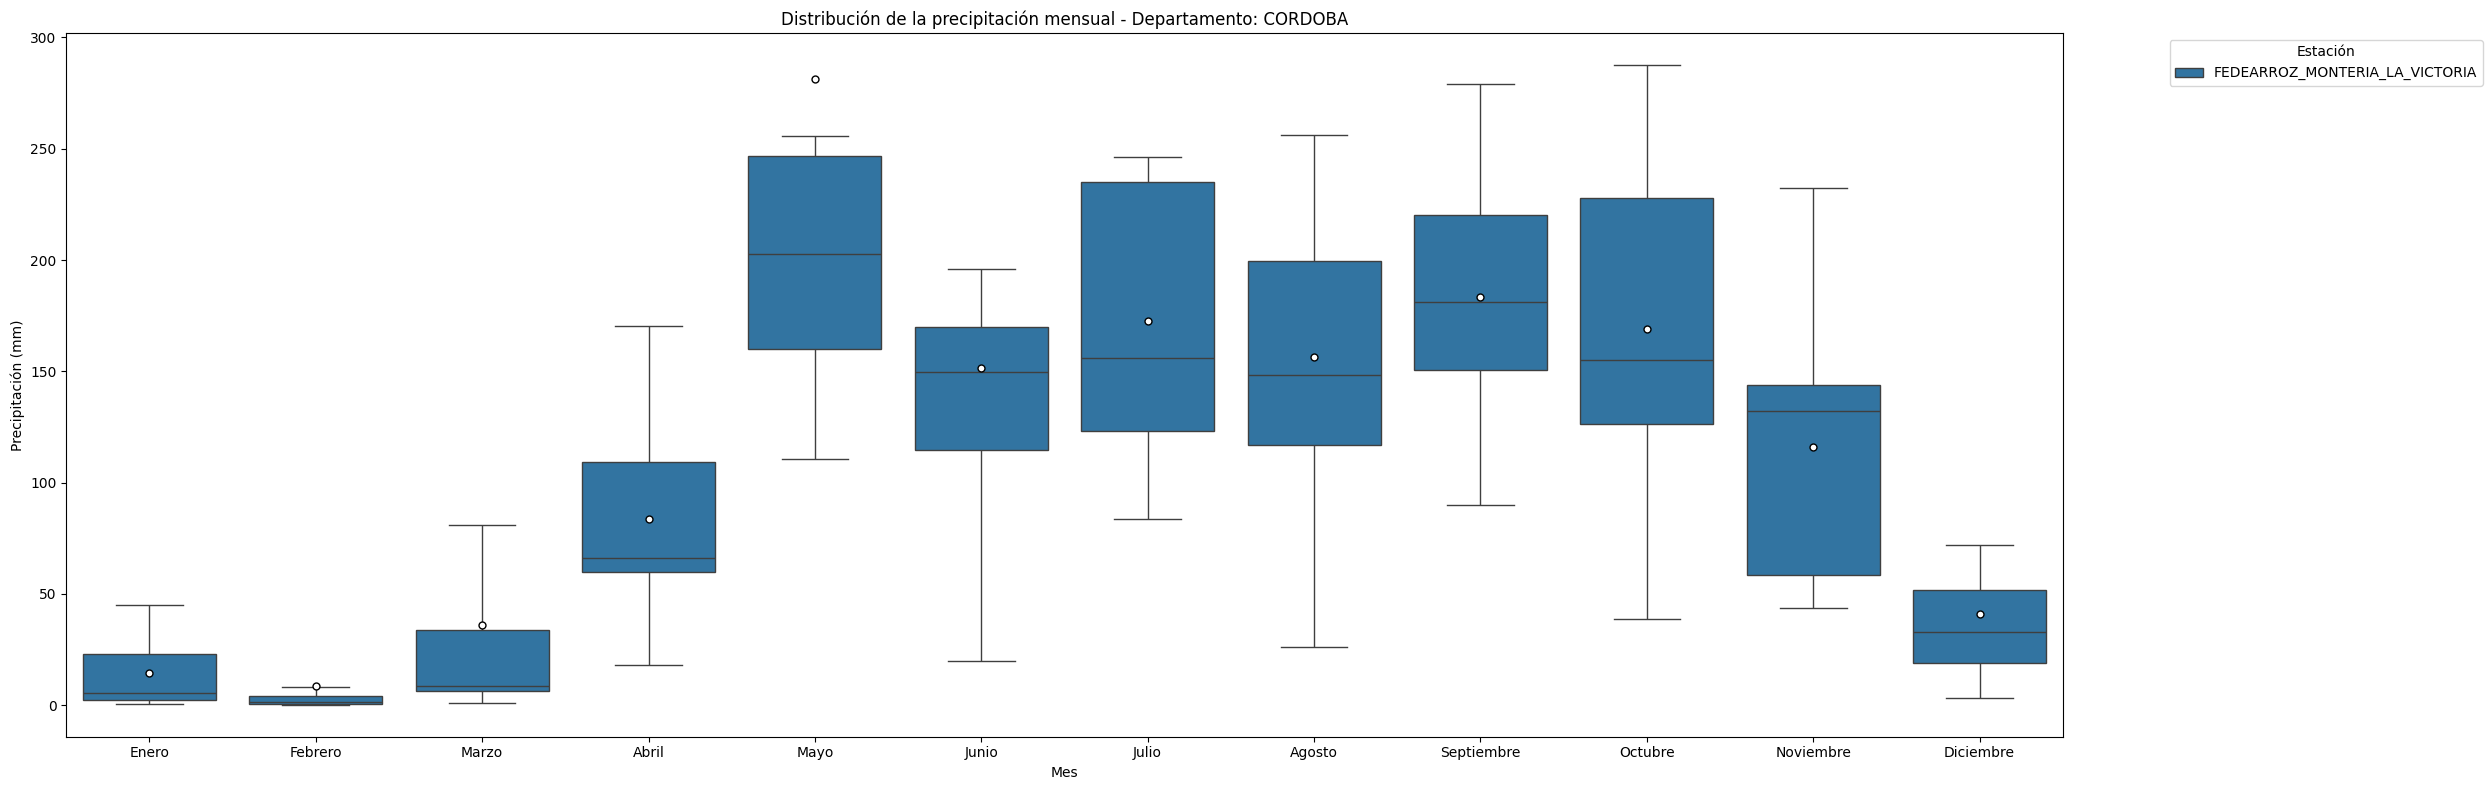

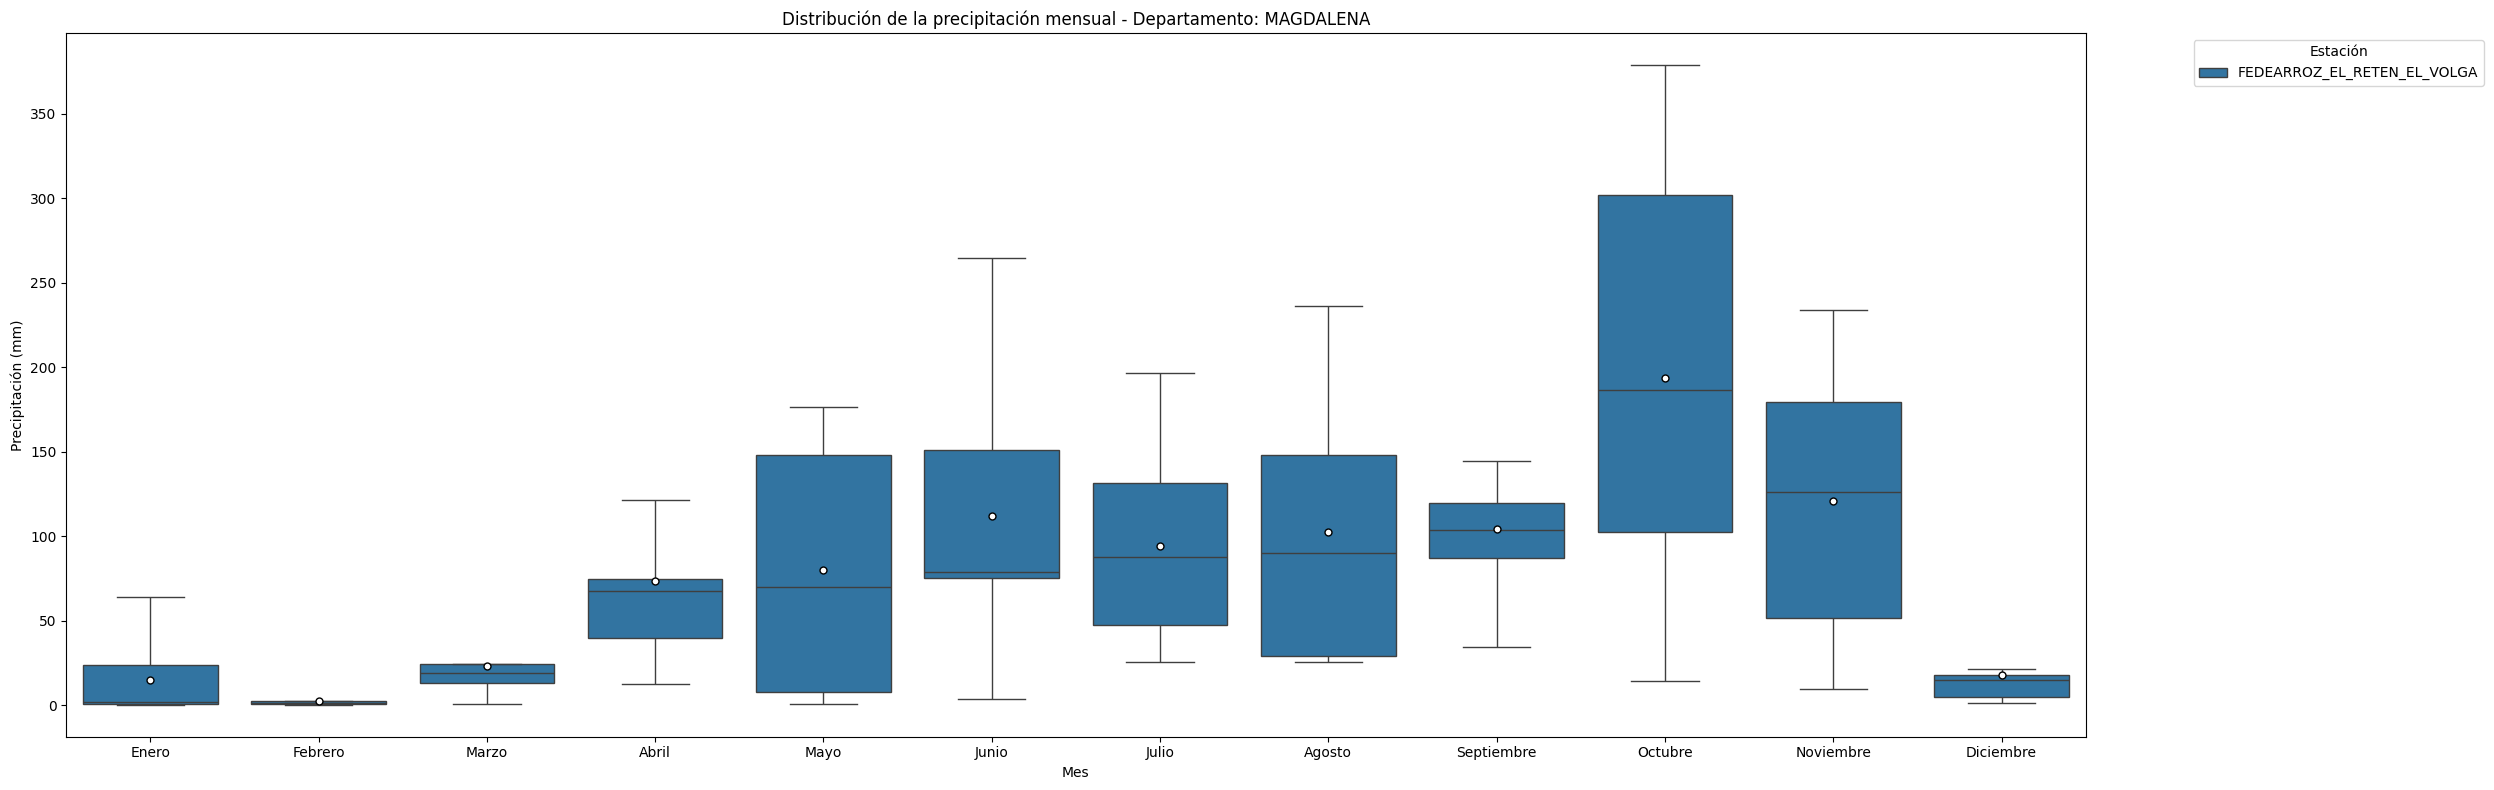

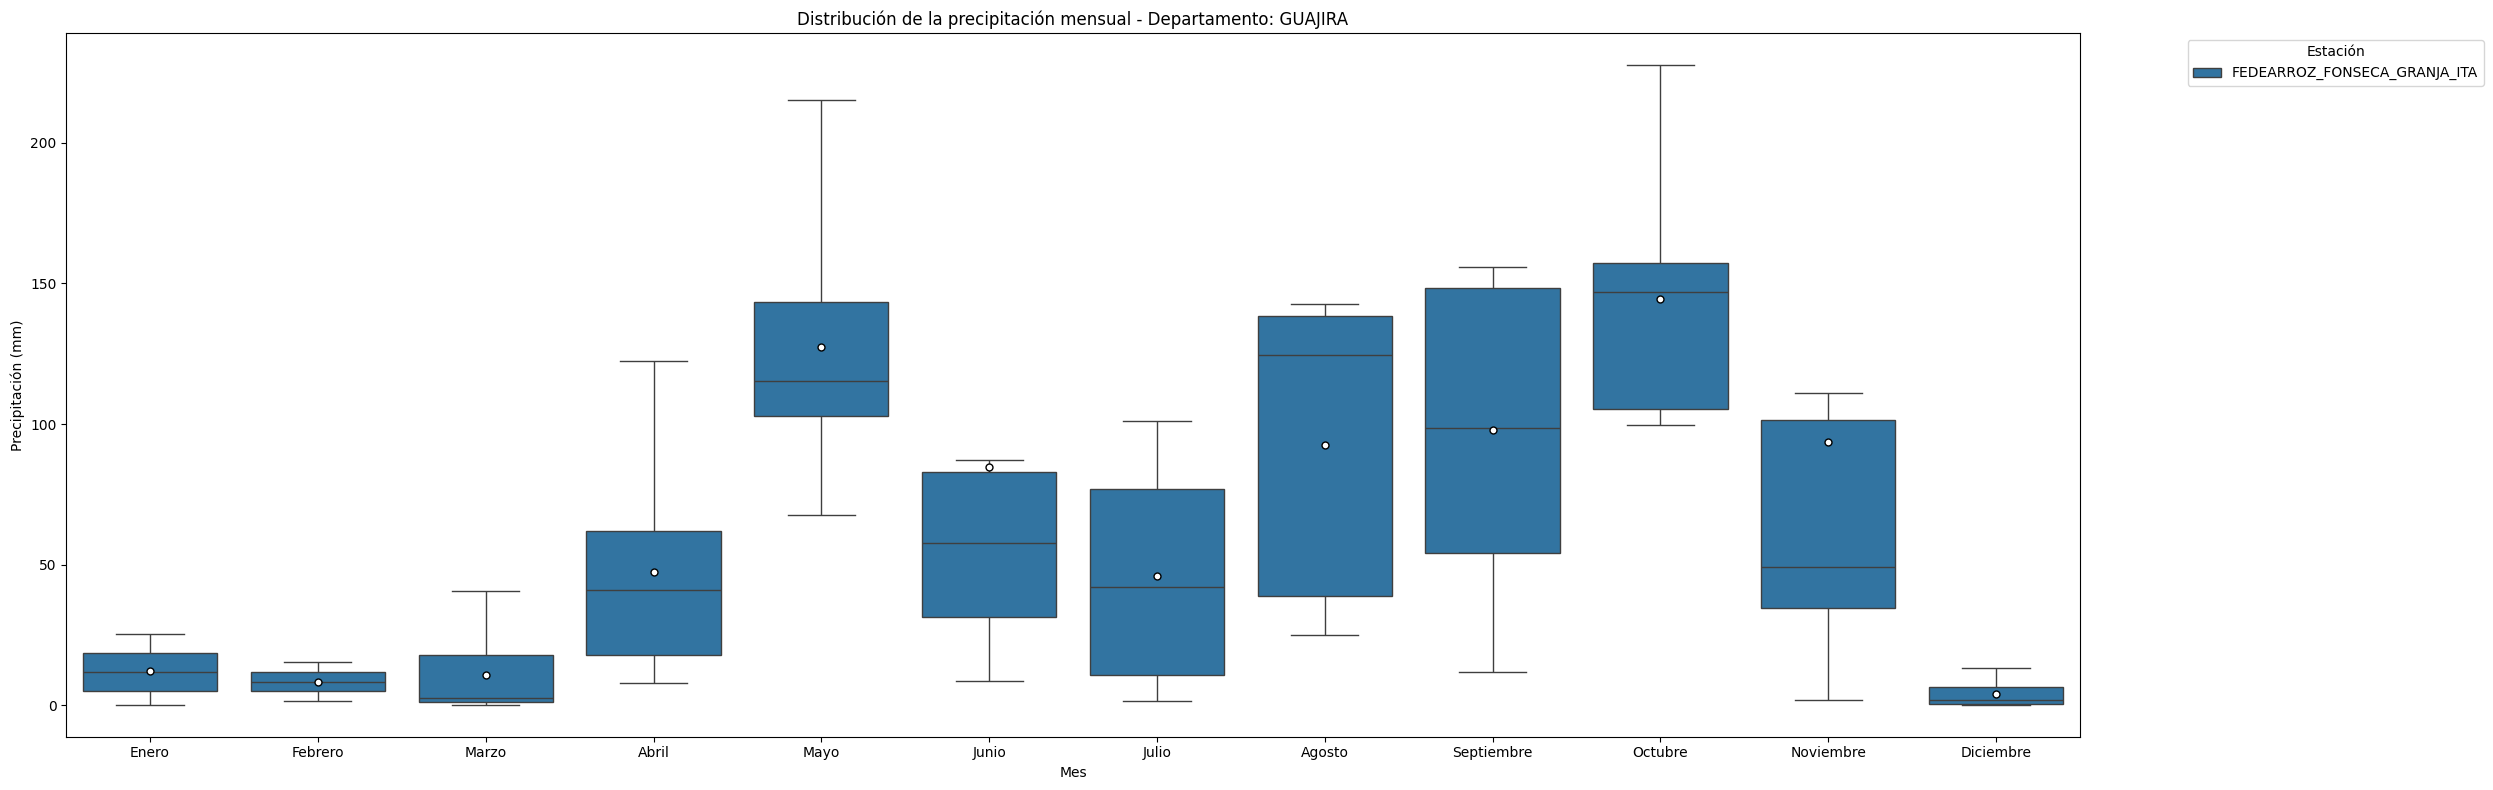

In [16]:
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Convertir la columna 'month_year' de Period a Timestamp si es necesario
if pd.api.types.is_period_dtype(monthly['month_year']):
    monthly['month_year'] = monthly['month_year'].apply(lambda x: x.to_timestamp())

# Extraer el mes de la columna 'month_year' y mapearlo a los nombres en español
monthly['mes'] = monthly['month_year'].dt.month.map(meses)

# Lista ordenada de los meses en español para que siempre se respete el orden
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
               'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Filtrar el DataFrame para la fuente fedearroz
df_fedearroz = monthly[monthly['fuente'] == 'fedearroz']

# Crear una gráfica separada para cada departamento
for dpto in df_fedearroz['dpto'].unique():
    df_dpto = df_fedearroz[df_fedearroz['dpto'] == dpto]
    
    plt.figure(figsize=(25, 8))
    
    # Crear los boxplots desagregados por estación y mes dentro del departamento, ordenando los meses
    ax = sns.boxplot(x='mes', y='prec_month', hue='station', data=df_dpto, whis=2, showfliers=False, 
                     order=orden_meses,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "black",
                       "markerfacecolor":"white",
                       "markersize": "5"},dodge=True)  
    
    
    # Añadir título y etiquetas
    plt.title(f'Distribución de la precipitación mensual - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Precipitación (mm)')
    
    # Ajustar la leyenda para que no se solape
    plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()


# por eventos de lluvia

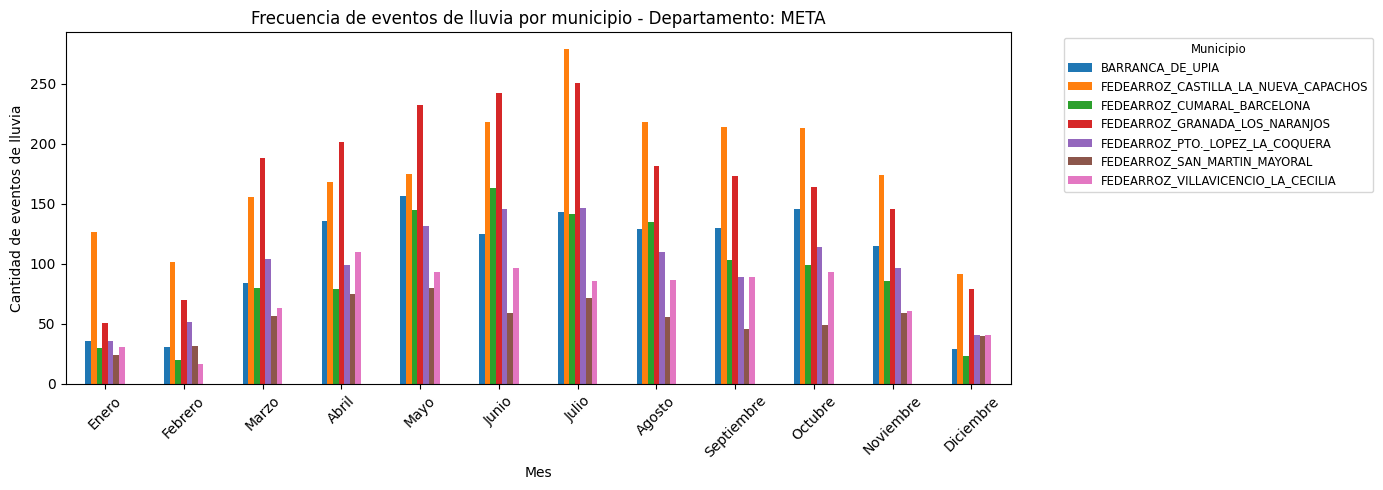

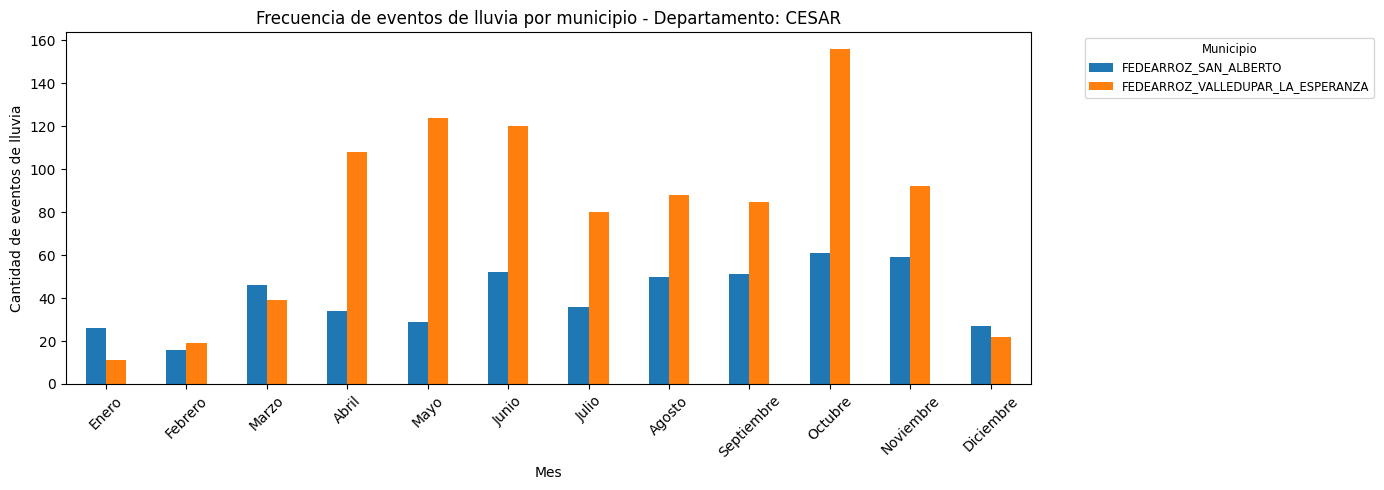

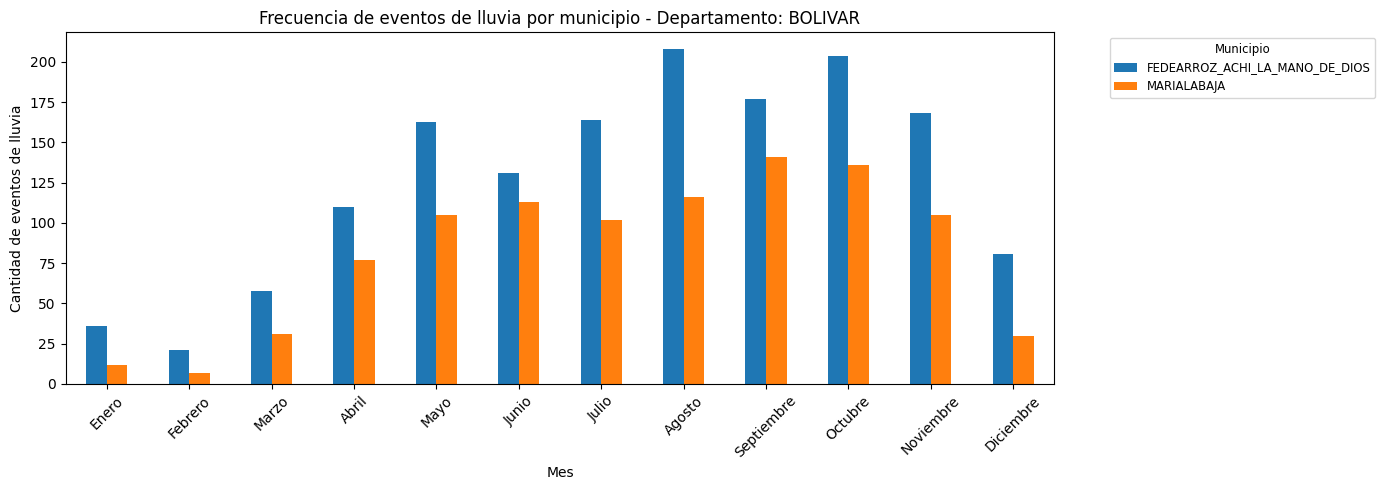

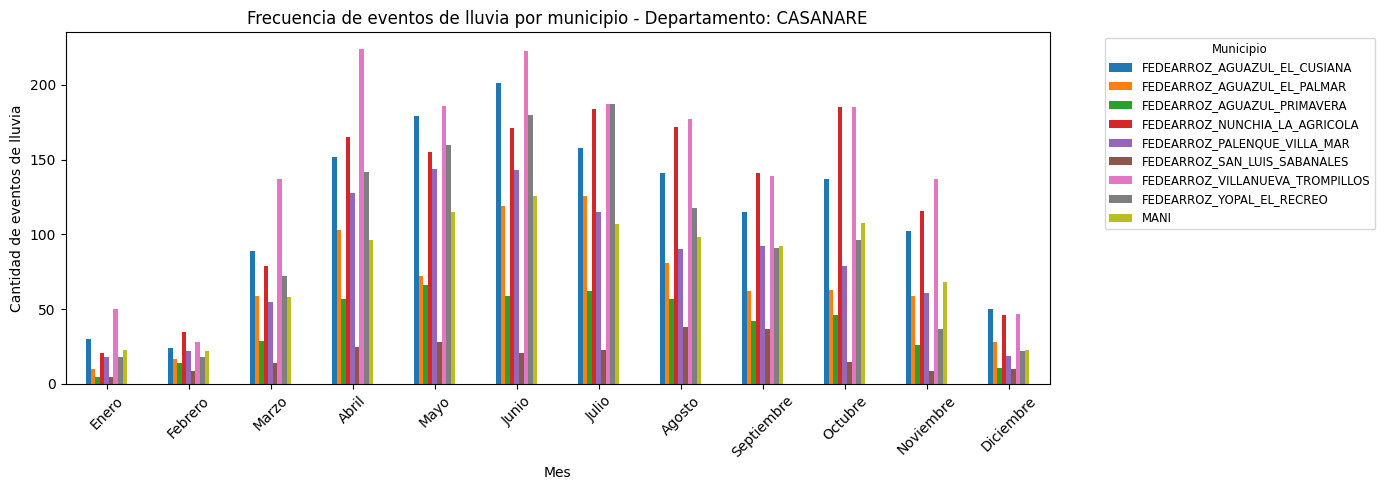

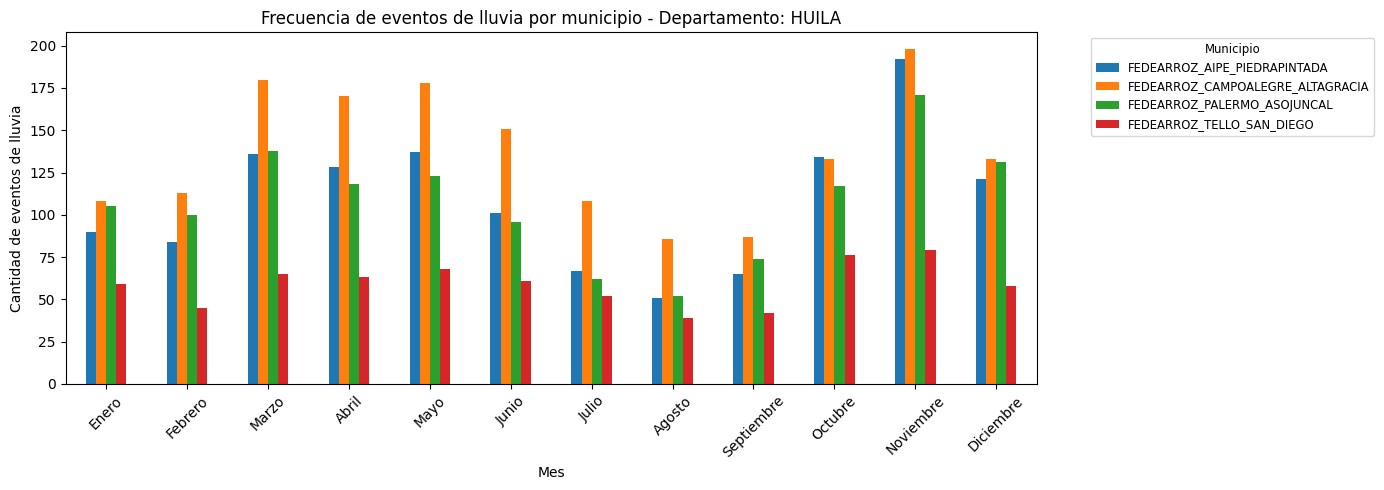

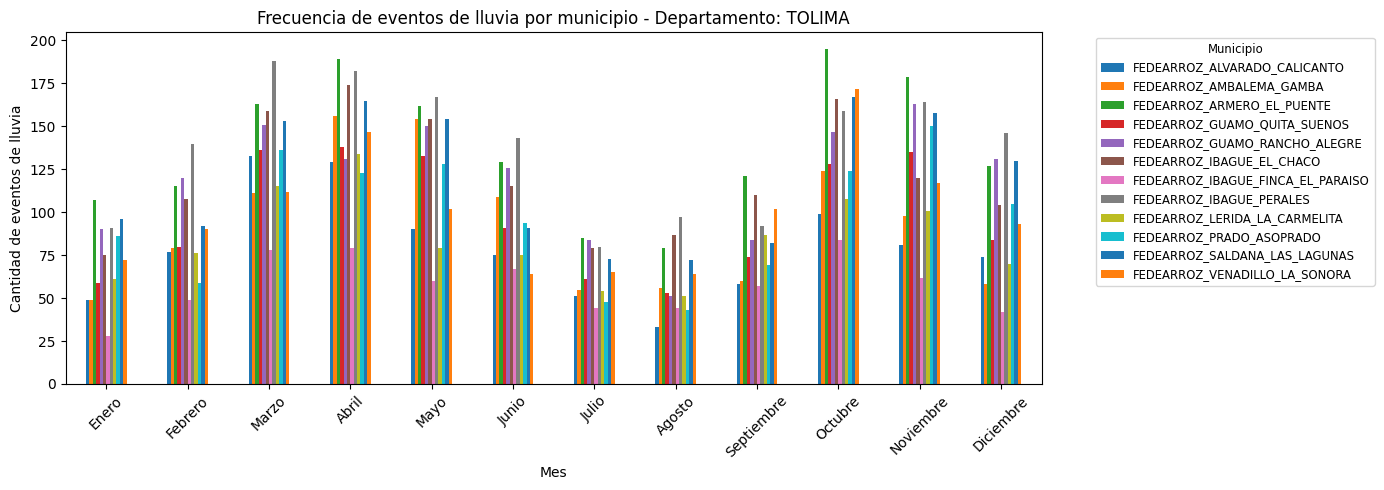

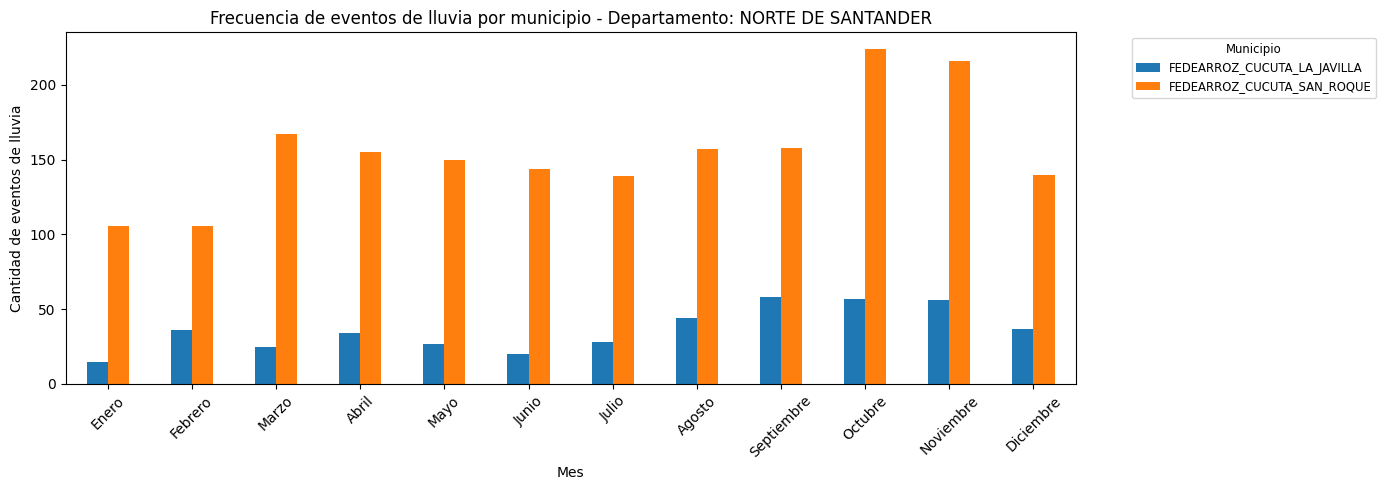

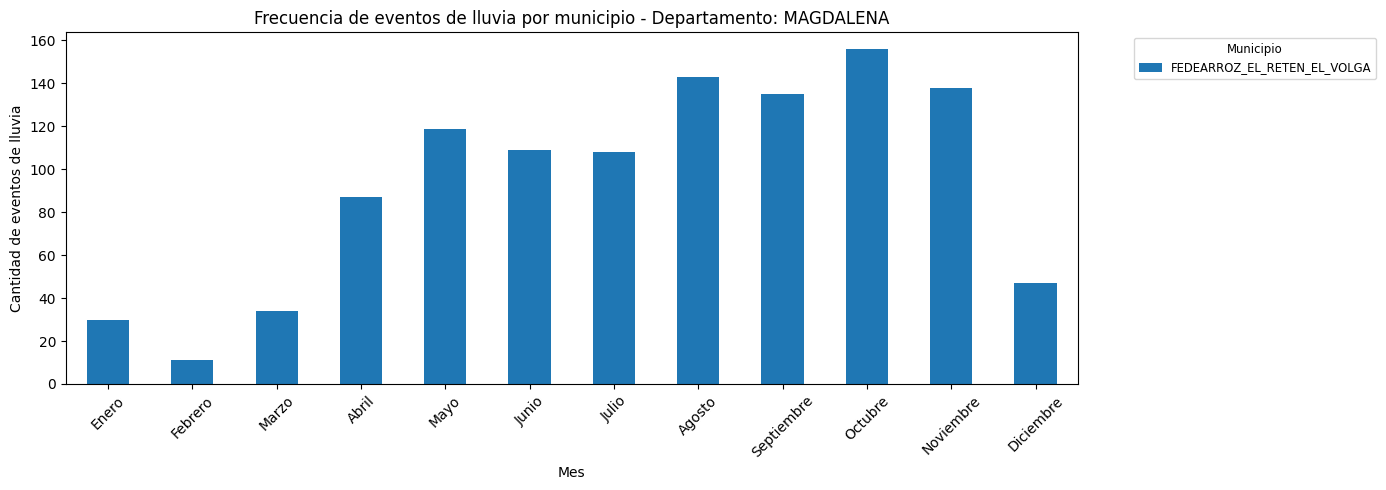

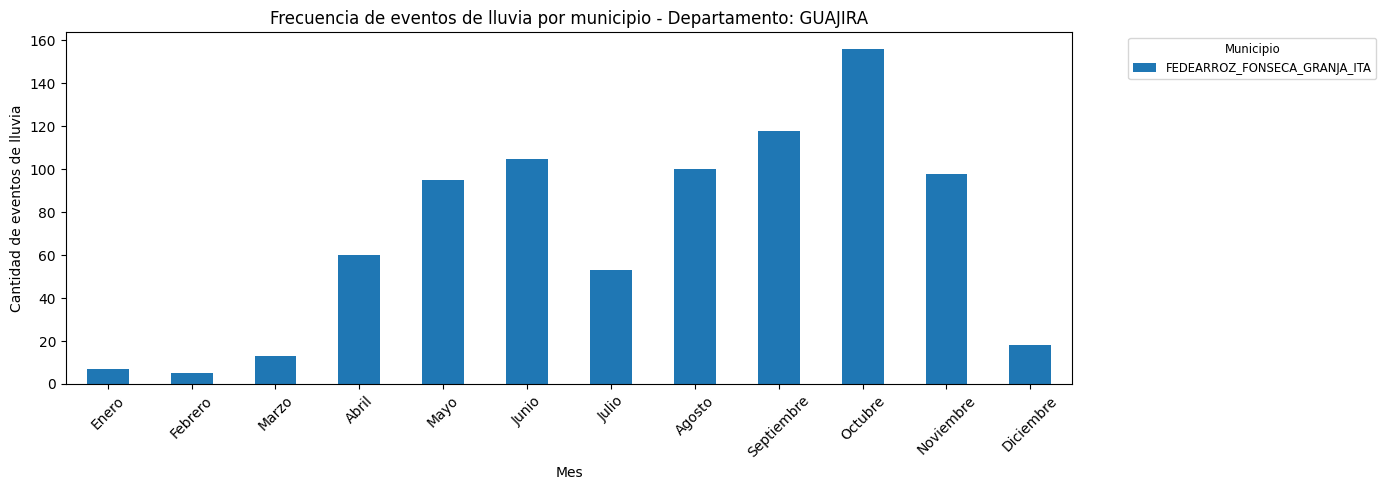

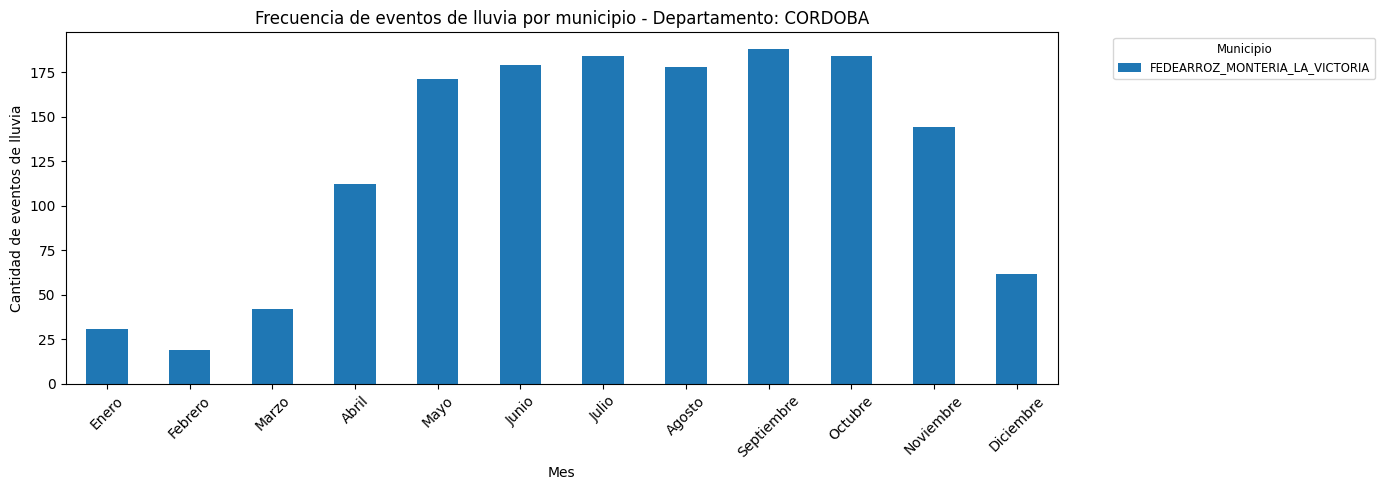

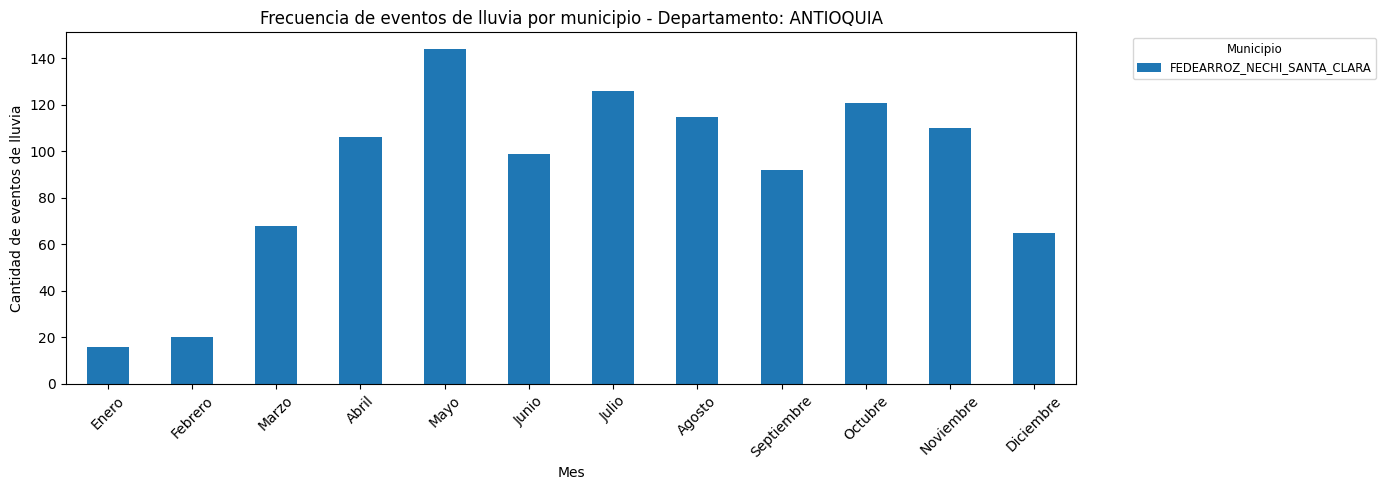

In [18]:
info_prec['date'] = pd.to_datetime(info_prec['date'])
info_prec['mes'] = info_prec['date'].dt.month

df_eventos_lluvia = info_prec[info_prec['evento_lluvia'] == 1]


for dpto in df_eventos_lluvia['dpto'].unique():
    df_dpto = df_eventos_lluvia[df_eventos_lluvia['dpto'] == dpto]
    
    eventos_por_mes_municipio = df_dpto.groupby(['mes', 'station']).size().unstack(fill_value=0)
    

    ax = eventos_por_mes_municipio.plot(kind='bar', figsize=(14, 5)) 
    
  
    plt.title(f'Frecuencia de eventos de lluvia por municipio - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de eventos de lluvia')
    
    
    plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)

 
    ax.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')


    plt.tight_layout()
    plt.show()


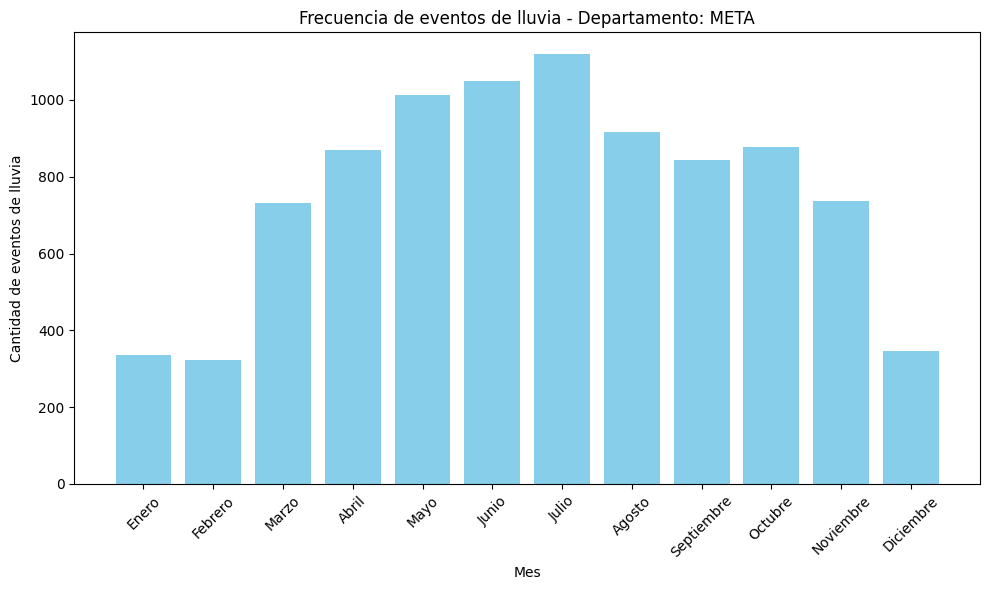

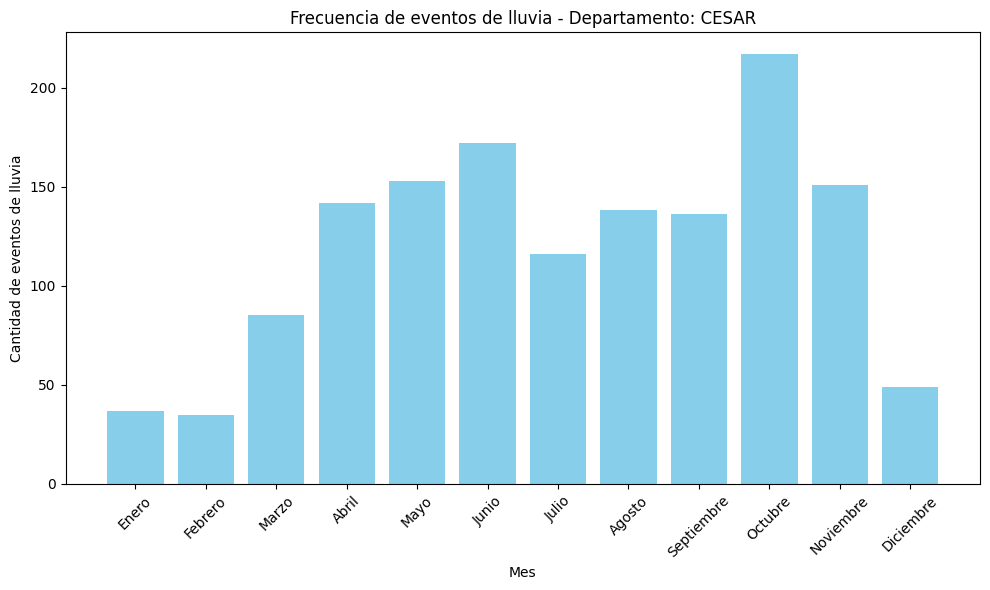

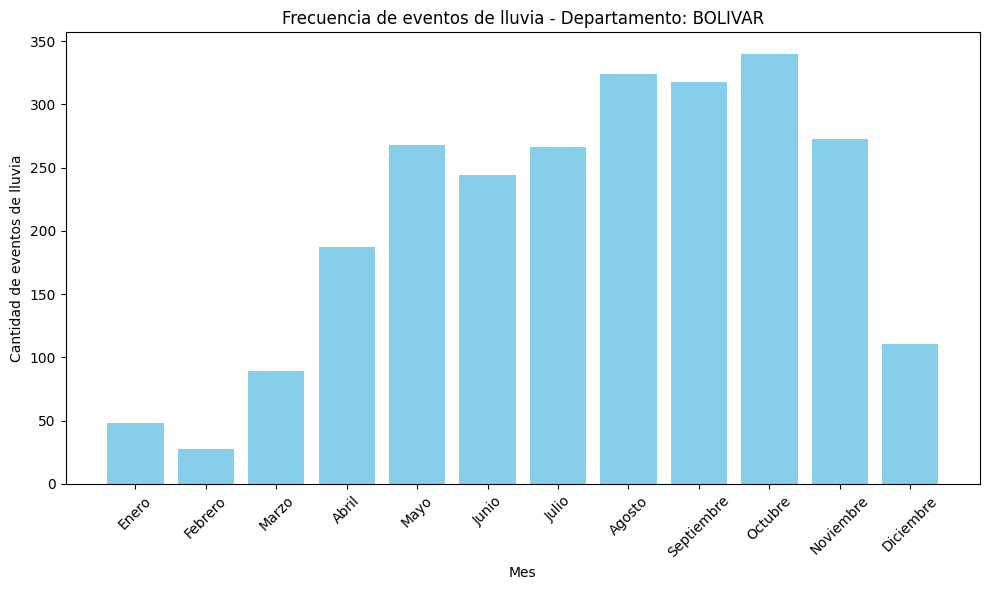

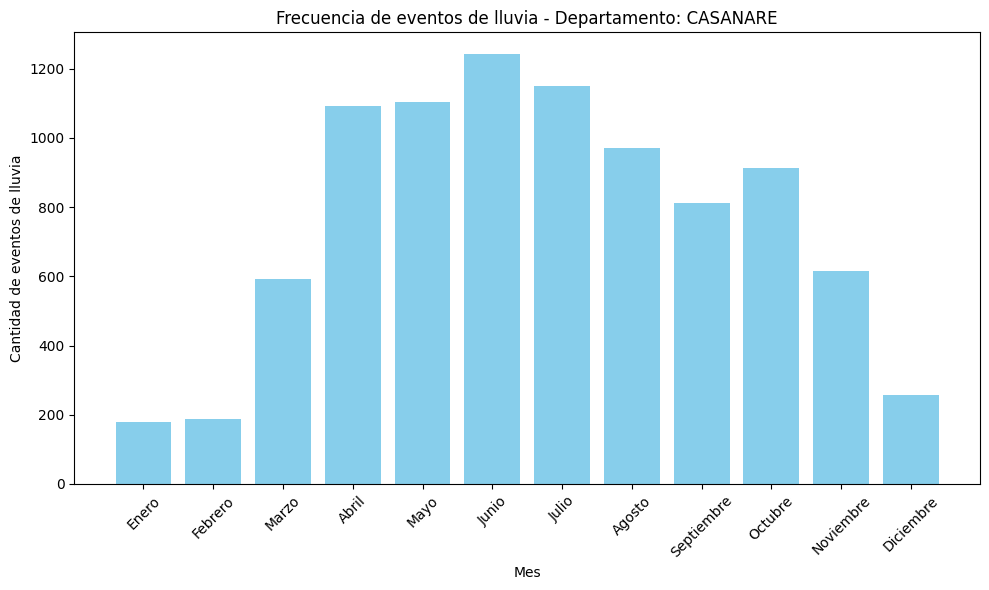

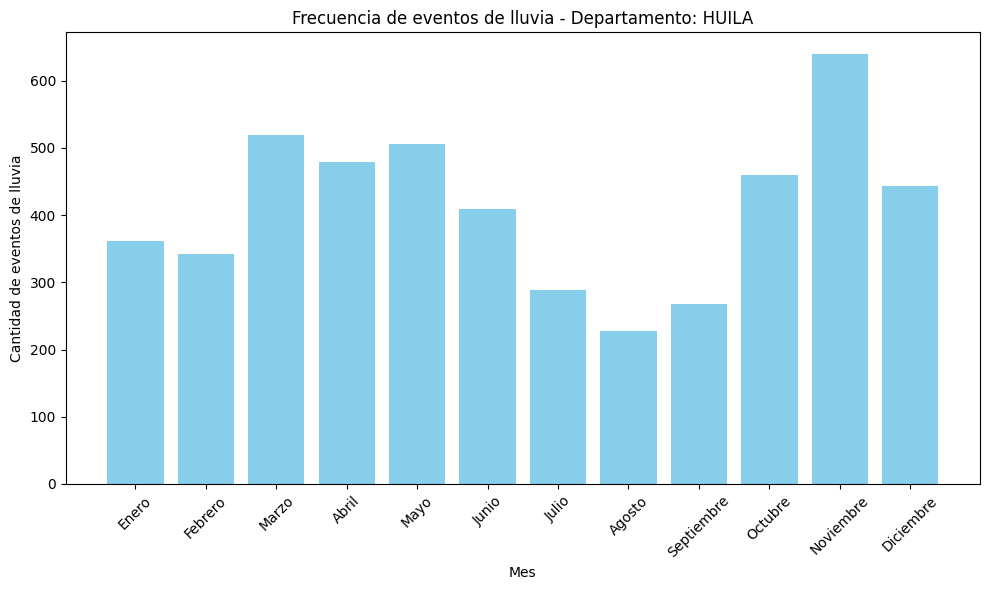

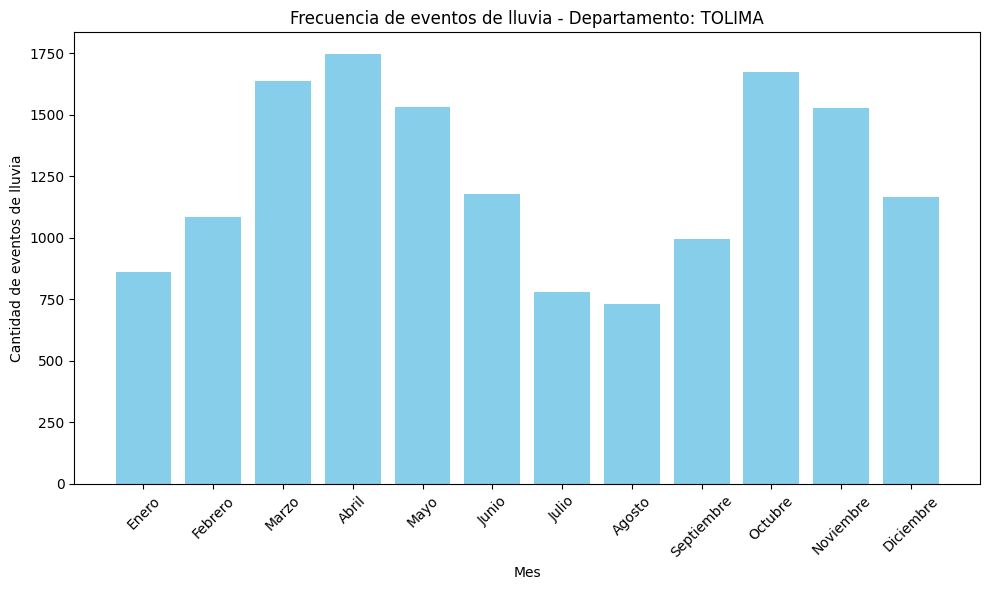

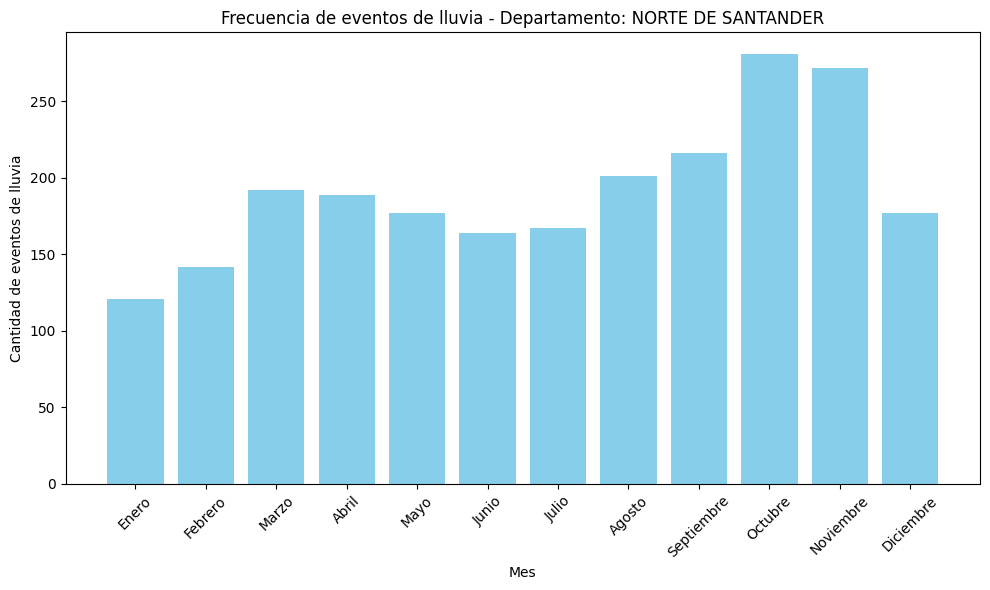

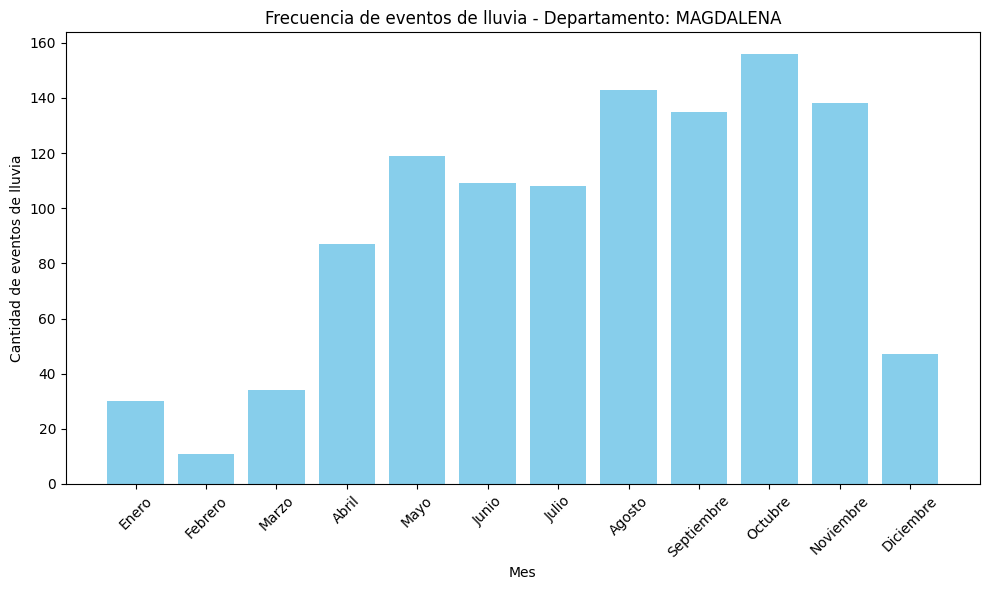

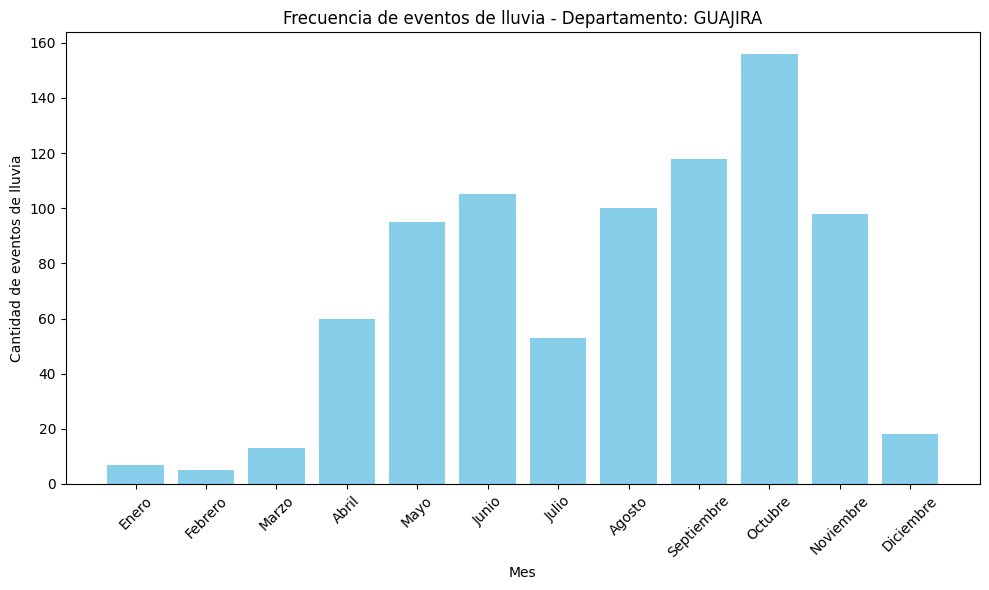

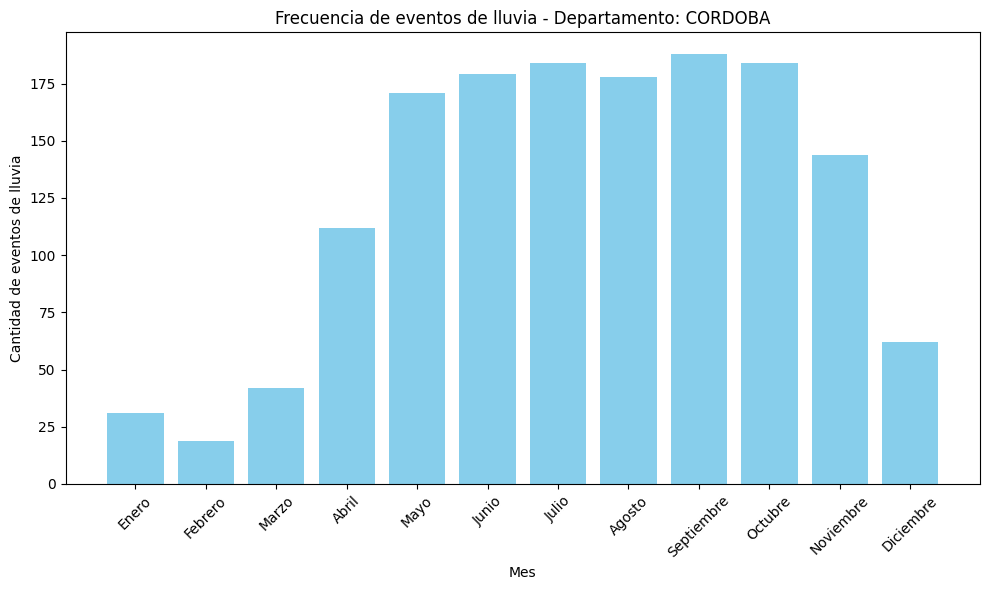

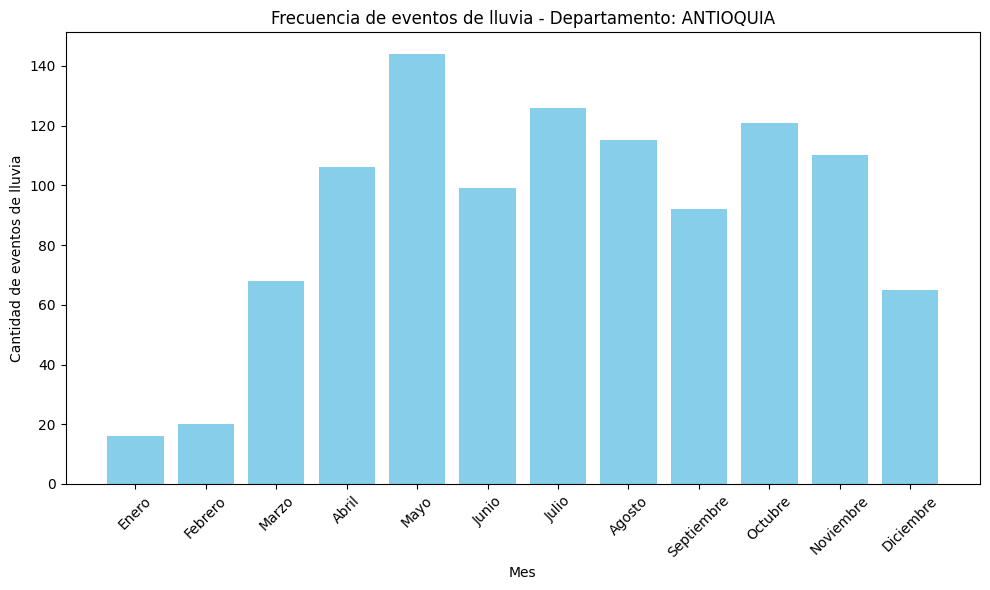

In [19]:
# Asegurarse de que 'date' esté en formato datetime
info_prec['date'] = pd.to_datetime(info_prec['date'])

# Crear una columna que extraiga el mes del 'date'
info_prec['mes'] = info_prec['date'].dt.month

# Filtrar solo los eventos de lluvia (evento_lluvia == 1)
df_eventos_lluvia = info_prec[info_prec['evento_lluvia'] == 1]

# Crear una gráfica separada para cada departamento
for dpto in df_eventos_lluvia['dpto'].unique():
    df_dpto = df_eventos_lluvia[df_eventos_lluvia['dpto'] == dpto]
    
    # Contar los eventos de lluvia por mes
    eventos_por_mes = df_dpto.groupby('mes').size()
    
    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(eventos_por_mes.index, eventos_por_mes.values, color='skyblue')

    # Añadir título y etiquetas
    plt.title(f'Frecuencia de eventos de lluvia - Departamento: {dpto}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de eventos de lluvia')
    
    # Ajustar la rotación de los ticks en el eje X
    plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
    
    # Ajustar el layout para que no se solapen los elementos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
